<a href="https://colab.research.google.com/github/yana-moshnikova/python-ai-moshnikova-yana/blob/main/notebooks/week3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация

In [5]:
# 📥 [0] Клонирование репозитория и загрузка данных о музеях

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Клонируем репозиторий
github_user = "yana-moshnikova"
repo = "python-ai-moshnikova-yana"

repo_path = f"/content/{repo}"
if not os.path.exists(repo_path):
    !git clone -q https://github.com/{github_user}/{repo}.git
if os.getcwd() != repo_path:
    %cd {repo_path}

print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем CSV-файл с музеями
df_museum = pd.read_csv("data/art_museum.csv")
original_len = len(df_museum)
print(f"📊 Загружено строк в df_museum: {original_len}")
print(f"📊 Исходные столбцы: {df_museum.columns.tolist()}\n")

# Шаг 3: Очистка данных для музеев
# Переименовываем столбцы с суффиксом Label
df_museum = df_museum.rename(columns={
    "museumLabel": "museum",
    "countryLabel": "country",
})

# Приводим числовые столбцы к целочисленному типу
numeric_cols = ["inceptionYear", "visitors", "area", "socialFollowers"]
for col in numeric_cols:
    df_museum[col] = pd.to_numeric(df_museum[col], errors="coerce").fillna(0).astype(int)

print("✅ df_museum очищен (переименование + приведение типов)\n")

# Шаг 4: Группировка данных по музею и стране (удаление дубликатов)
print(f"📊 До группировки: {len(df_museum)} записей")
df_museum = df_museum.groupby(["museum", "country"], as_index=False).agg({
    "inceptionYear": lambda x: x[x > 0].min() if (x > 0).any() else 0,
    "visitors": "max",
    "area": "max",
    "socialFollowers": "max"
})
print(f"✅ После группировки: {len(df_museum)} уникальных музеев")
print(f"🗑️ Объединено дубликатов: {original_len - len(df_museum)} записей\n")

# Краткий обзор итогового датасета
print("📋 Структура df_museum (музеи):")
print(f"   Столбцы: {', '.join(df_museum.columns)}")
print(f"   Уникальных музеев: {df_museum['museum'].nunique()}")
print(f"   Уникальных стран: {df_museum['country'].nunique()}")
print(f"   Диапазон лет основания: {df_museum['inceptionYear'].min()} — {df_museum['inceptionYear'].max()}")
print(f"   Диапазон посещаемости: {df_museum['visitors'].min()} — {df_museum['visitors'].max()} чел.")
print(f"   Диапазон площади: {df_museum['area'].min()} — {df_museum['area'].max()} м²")
print(f"   Диапазон подписчиков: {df_museum['socialFollowers'].min()} — {df_museum['socialFollowers'].max()}\n")

print(f"🔍 Первые 3 строки df_museum:\n{df_museum.head(3)}")

/content/python-ai-moshnikova-yana
✅ Репозиторий готов

📊 Загружено строк в df_museum: 3228
📊 Исходные столбцы: ['museumLabel', 'inceptionYear', 'countryLabel', 'visitors', 'area', 'socialFollowers']

✅ df_museum очищен (переименование + приведение типов)

📊 До группировки: 3228 записей
✅ После группировки: 529 уникальных музеев
🗑️ Объединено дубликатов: 2699 записей

📋 Структура df_museum (музеи):
   Столбцы: museum, country, inceptionYear, visitors, area, socialFollowers
   Уникальных музеев: 529
   Уникальных стран: 30
   Диапазон лет основания: 0 — 2025
   Диапазон посещаемости: 0 — 8132518 чел.
   Диапазон площади: 0 — 523087 м²
   Диапазон подписчиков: 0 — 4704971

🔍 Первые 3 строки df_museum:
                                       museum country  inceptionYear  \
0  "Mons. Aurelio Sorrentino" Diocesan Museum  Италия           2010   
1  Abbazia di Monte Oliveto Maggiore - Museum  Италия           2000   
2                            Accademia Tadini  Италия           1829   

  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#🌟 Промпт 1: Разведочный анализ

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots

# Настройка стиля для matplotlib/seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#1. Топ-15 стран по количеству музеев (горизонтальная столбчатая диаграмма)

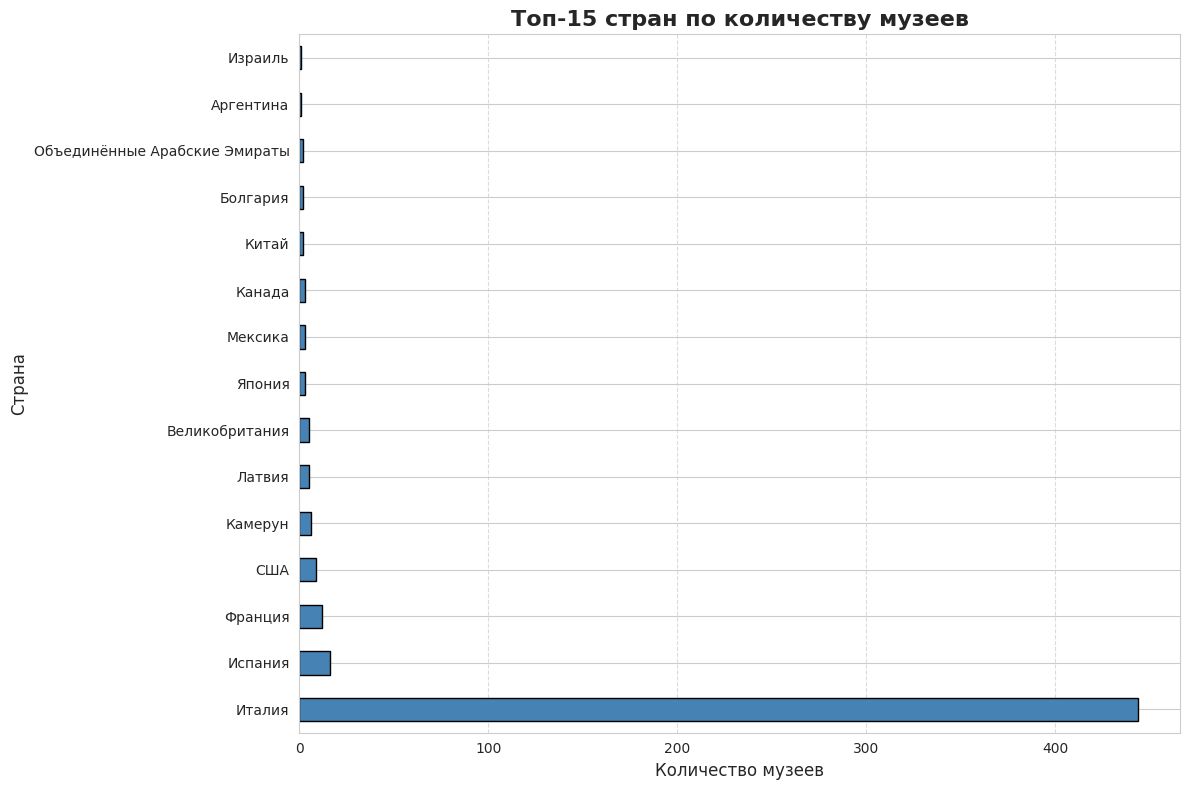

In [6]:
# Подсчёт музеев по странам и выбор топ-15
country_counts = df_museum['country'].value_counts().head(15).sort_values()

plt.figure(figsize=(12, 8))
country_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Топ-15 стран по количеству музеев', fontsize=16, fontweight='bold')
plt.xlabel('Количество музеев', fontsize=12)
plt.ylabel('Страна', fontsize=12)
plt.gca().invert_yaxis()  # чтобы наибольший был сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Инсайт: Италия абсолютный лидер по числу музеев (444 из 529), что может указывать на высокую плотность культурного наследия или особенности выборки. Остальные страны представлены значительно меньшим количеством.

#2. Распределение годов основания музеев (гистограмма + KDE)

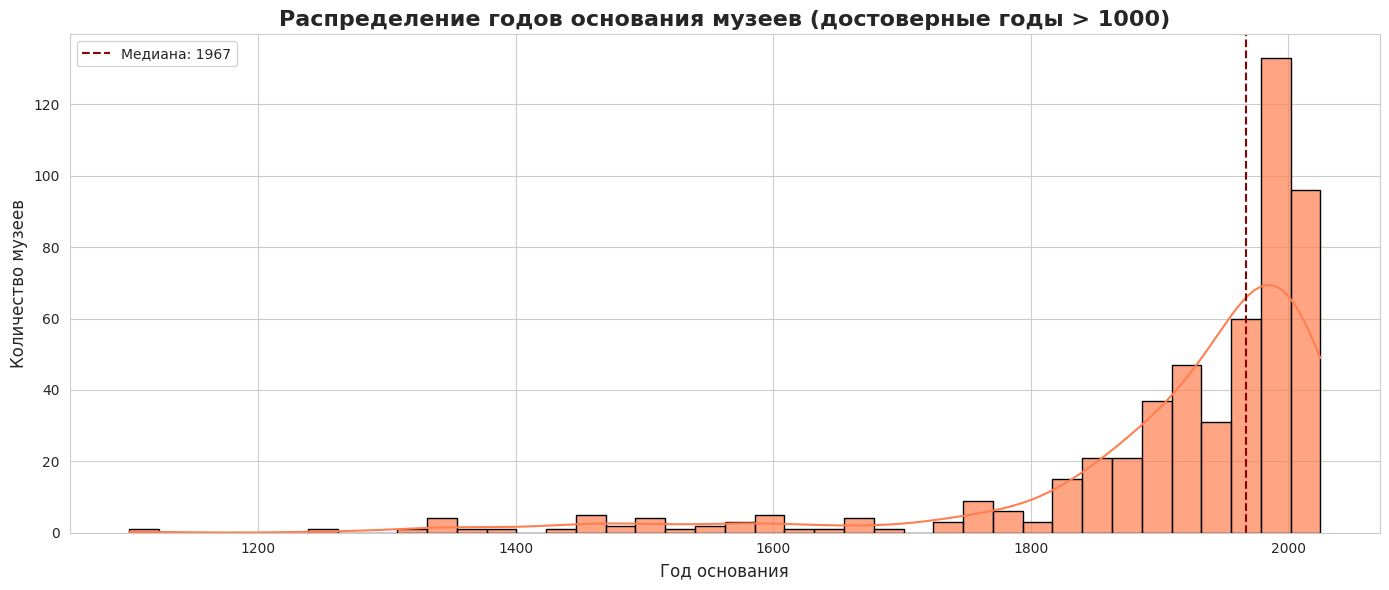

In [7]:
plt.figure(figsize=(14, 6))
# Исключаем нулевые годы (артефакты очистки) для более реалистичной картины
valid_years = df_museum[df_museum['inceptionYear'] > 1000]['inceptionYear']

sns.histplot(valid_years, bins=40, kde=True, color='coral', edgecolor='black', alpha=0.7)
plt.title('Распределение годов основания музеев (достоверные годы > 1000)', fontsize=16, fontweight='bold')
plt.xlabel('Год основания', fontsize=12)
plt.ylabel('Количество музеев', fontsize=12)
plt.axvline(valid_years.median(), color='darkred', linestyle='--', label=f'Медиана: {int(valid_years.median())}')
plt.legend()
plt.tight_layout()
plt.show()

Инсайт: Пик основания музеев приходится на конец XIX – начало XX века. Присутствуют древние музеи (XI–XIV века), но их крайне мало. Также заметен всплеск в последние десятилетия.

#3. Зависимость посещаемости от площади (scatter plot с цветом по подписчикам)

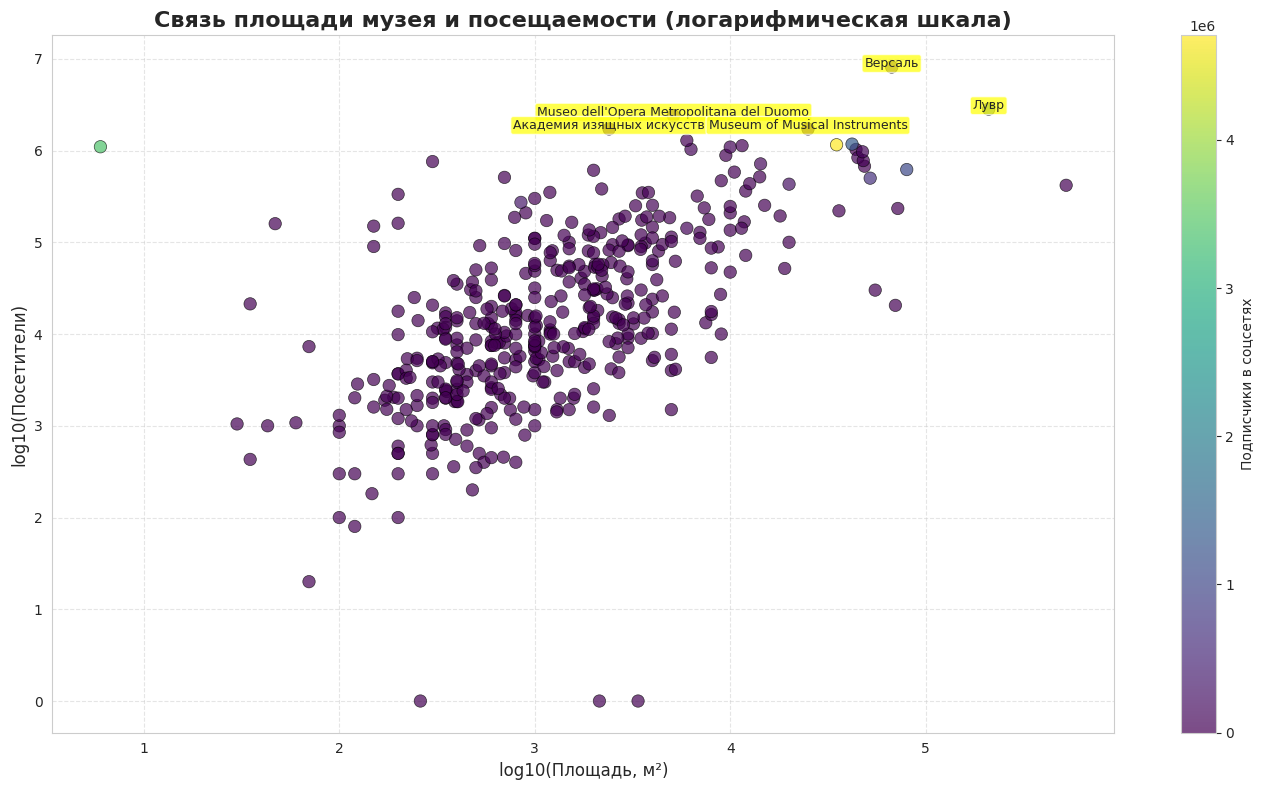

In [8]:
# Для наглядности добавим логарифмические шкалы и отфильтруем нули
df_plot = df_museum[(df_museum['visitors'] > 0) & (df_museum['area'] > 0)].copy()
df_plot['log_visitors'] = np.log10(df_plot['visitors'])
df_plot['log_area'] = np.log10(df_plot['area'])

plt.figure(figsize=(14, 8))
sc = plt.scatter(df_plot['log_area'], df_plot['log_visitors'],
                 c=df_plot['socialFollowers'], cmap='viridis',
                 s=80, alpha=0.7, edgecolor='black', linewidth=0.5)
plt.colorbar(sc, label='Подписчики в соцсетях')
plt.title('Связь площади музея и посещаемости (логарифмическая шкала)', fontsize=16, fontweight='bold')
plt.xlabel('log10(Площадь, м²)', fontsize=12)
plt.ylabel('log10(Посетители)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Добавим подписи для нескольких самых крупных музеев
top_museums = df_plot.nlargest(5, 'visitors')[['museum', 'log_area', 'log_visitors']]
for _, row in top_museums.iterrows():
    plt.annotate(row['museum'], (row['log_area'], row['log_visitors']),
                 fontsize=9, ha='center', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7))
plt.tight_layout()
plt.show()

Инсайт: Наблюдается положительная корреляция между площадью и посещаемостью, особенно для крупных музеев. Лувр, Эрмитаж и Метрополитен выделяются как по площади, так и по числу посетителей. Цвет подписчиков показывает, что самые популярные в соцсетях музеи не всегда самые большие (например, Тейт Модерн).

#4. Распределение посещаемости в топ-5 странах (ящик с усами)

/tmp/ipython-input-1787261749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='country', y='visitors', palette='Set2', order=top5_countries)


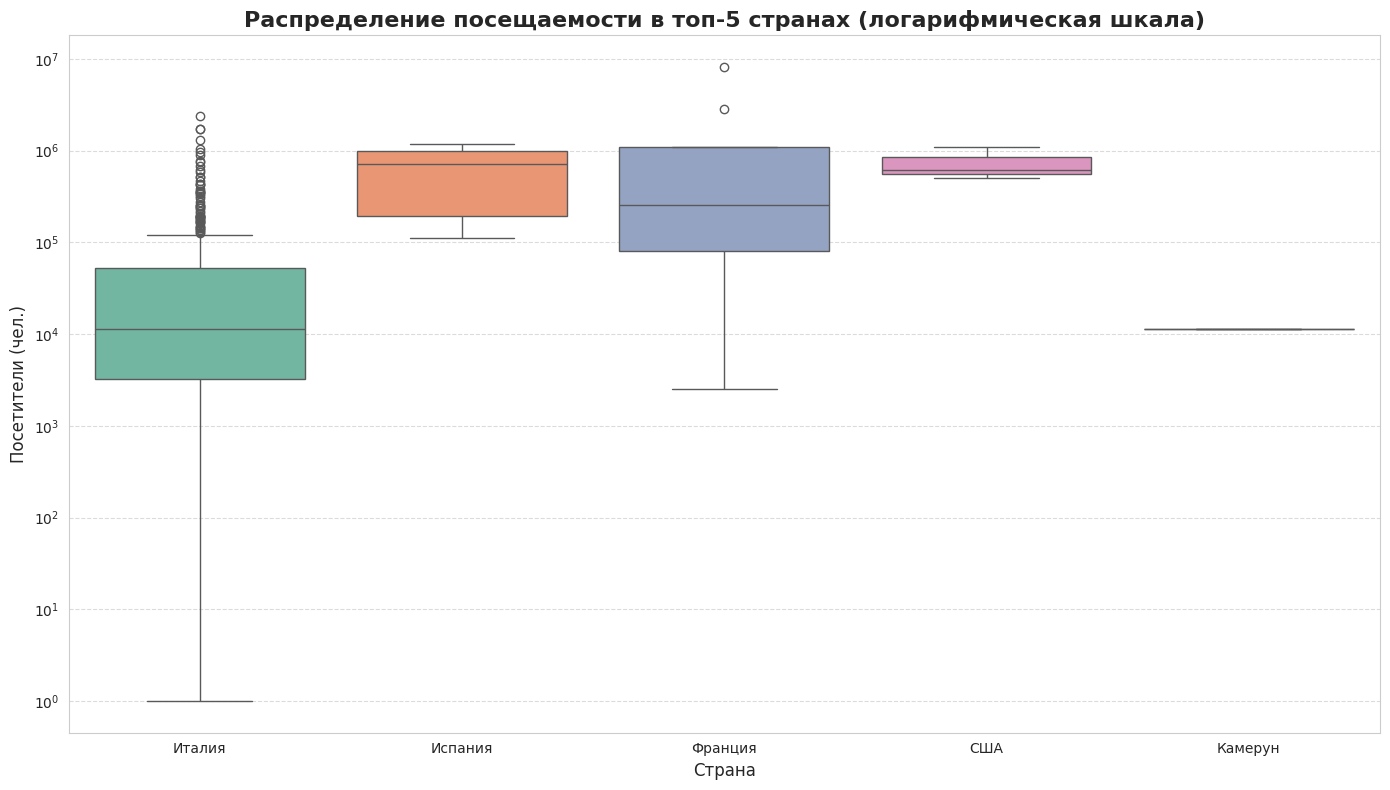

In [9]:
# Выберем топ-5 стран по числу музеев
top5_countries = df_museum['country'].value_counts().head(5).index.tolist()
df_top5 = df_museum[df_museum['country'].isin(top5_countries)].copy()
# Исключим нулевую посещаемость для более адекватного боксплота
df_top5 = df_top5[df_top5['visitors'] > 0]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top5, x='country', y='visitors', palette='Set2', order=top5_countries)
plt.yscale('log')  # логарифмическая шкала для лучшей визуализации
plt.title('Распределение посещаемости в топ-5 странах (логарифмическая шкала)', fontsize=16, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Посетители (чел.)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Инсайт: В Италии самый широкий разброс посещаемости – от небольших муниципальных музеев до гигантов (например, Уффици). В США и Великобритании медианная посещаемость выше, но разброс меньше. Это говорит о разной структуре музейной сети в этих странах.

#5. Топ-10 музеев по подписчикам в соцсетях (горизонтальная полоса)

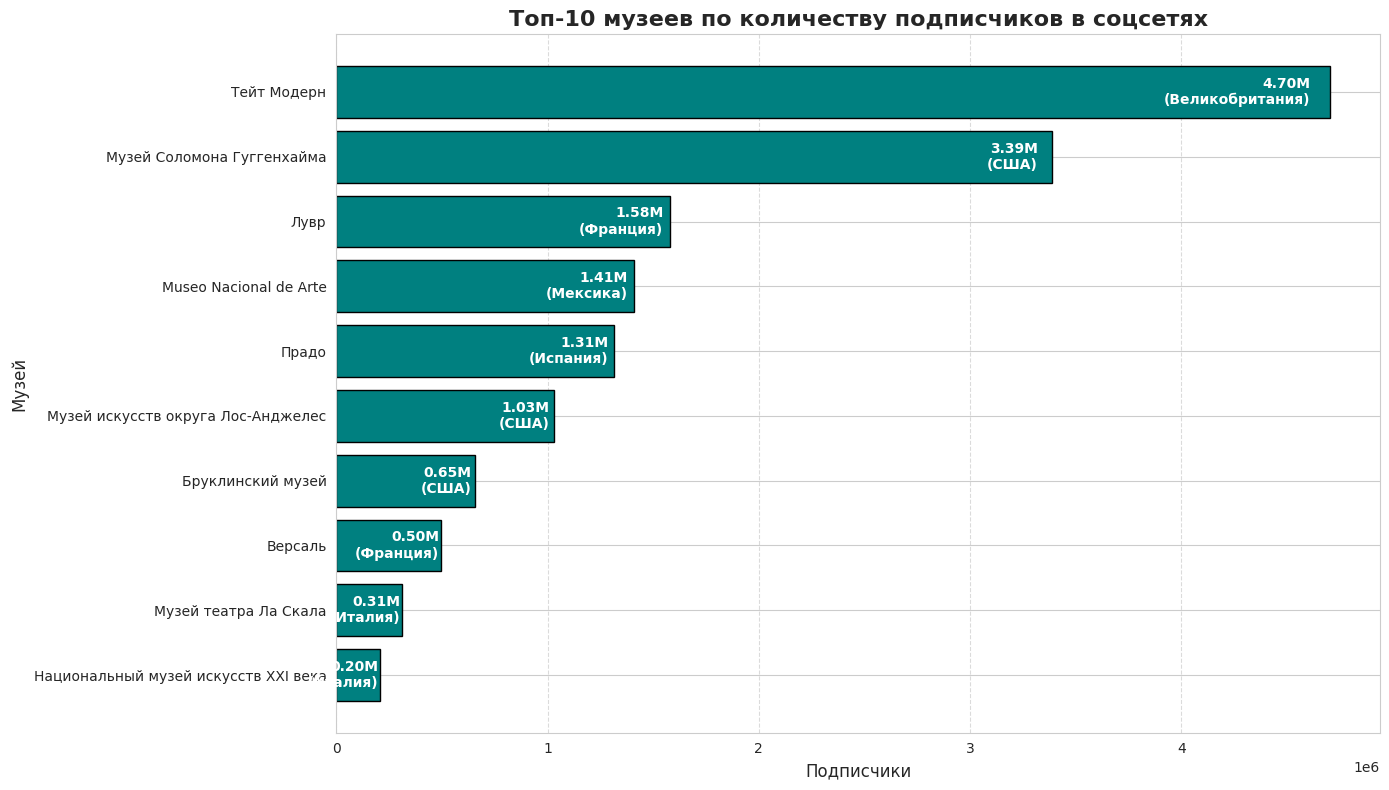

In [10]:
# Отфильтруем ненулевых подписчиков
top_followers = df_museum.nlargest(10, 'socialFollowers')[['museum', 'country', 'socialFollowers']].sort_values('socialFollowers')

plt.figure(figsize=(14, 8))
bars = plt.barh(top_followers['museum'], top_followers['socialFollowers'], color='teal', edgecolor='black')
plt.title('Топ-10 музеев по количеству подписчиков в соцсетях', fontsize=16, fontweight='bold')
plt.xlabel('Подписчики', fontsize=12)
plt.ylabel('Музей', fontsize=12)

# Добавим значения на график
for bar, followers, country in zip(bars, top_followers['socialFollowers'], top_followers['country']):
    plt.text(bar.get_width()*0.98, bar.get_y() + bar.get_height()/2,
             f'{followers/1e6:.2f}M\n({country})',
             va='center', ha='right', fontsize=10, color='white', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Инсайт: Тейт Модерн (Лондон) неожиданно лидирует по подписчикам, обгоняя даже Лувр. Это может быть связано с активной маркетинговой стратегией и молодой аудиторией. В топе также представлены музеи США, Испании, Мексики.

#6. Treemap: доля музеев по странам с цветовой индикацией средней посещаемости

In [11]:
# Подготовка данных для treemap
country_stats = df_museum.groupby('country').agg(
    count=('museum', 'count'),
    mean_visitors=('visitors', 'mean')
).reset_index()
country_stats = country_stats.sort_values('count', ascending=False).head(15)  # ограничим для читаемости

# Используем plotly для интерактивного treemap
fig = px.treemap(country_stats,
                 path=['country'],
                 values='count',
                 color='mean_visitors',
                 color_continuous_scale='RdBu_r',
                 title='Treemap: доля музеев по странам (цвет — средняя посещаемость)',
                 width=1000, height=600)
fig.update_traces(textinfo="label+value", textfont_size=12)
fig.show()

Инсайт: Италия занимает подавляющую долю по количеству музеев, но средняя посещаемость в ней не самая высокая (цвет ближе к синему). Напротив, США, Франция и Великобритания при небольшом числе музеев имеют высокую среднюю посещаемость (жёлтые оттенки).

#7. Тепловая карта корреляции числовых признаков (включая логарифмические версии)

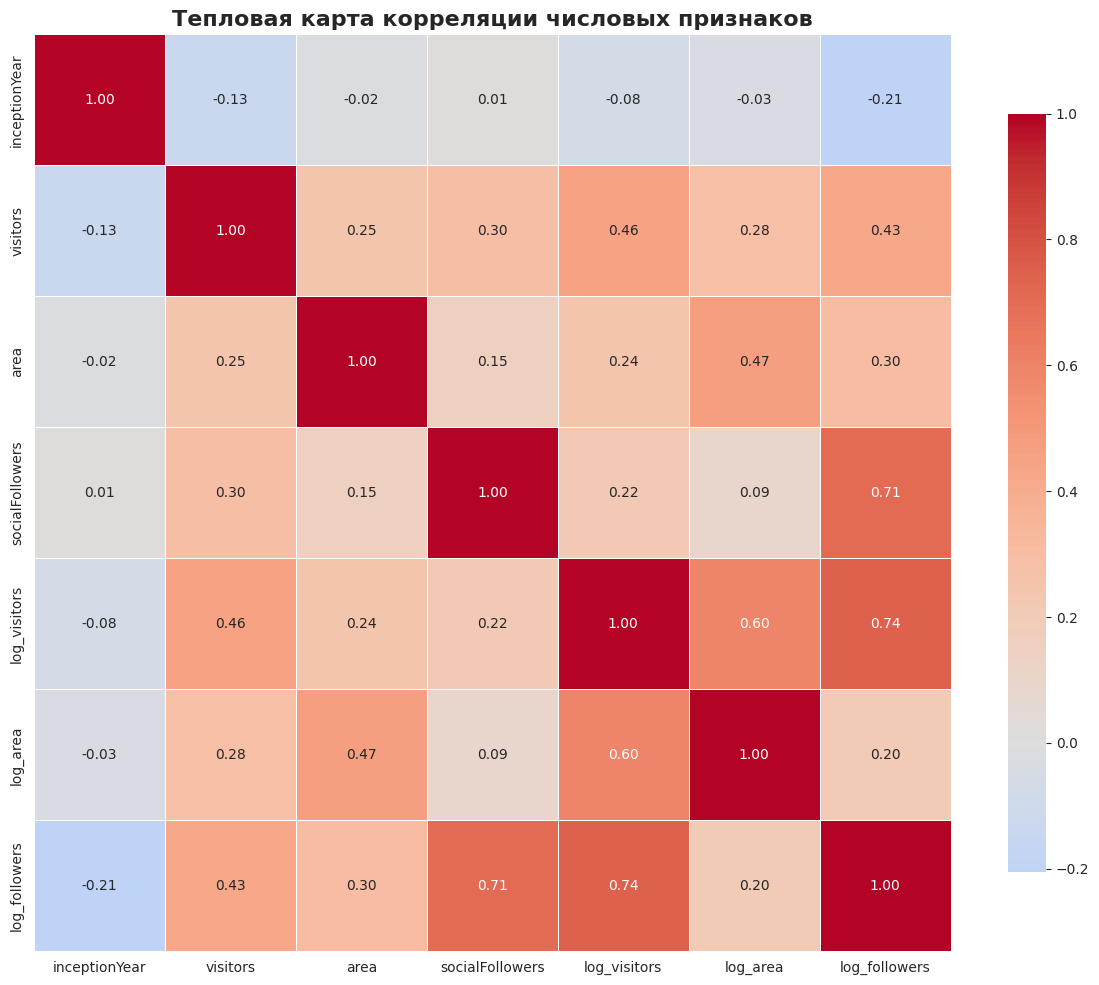

In [12]:
# Создадим копию с логарифмическими преобразованиями для ненулевых значений
df_corr = df_museum.copy()
df_corr['log_visitors'] = np.log10(df_corr['visitors'].replace(0, np.nan))
df_corr['log_area'] = np.log10(df_corr['area'].replace(0, np.nan))
df_corr['log_followers'] = np.log10(df_corr['socialFollowers'].replace(0, np.nan))

# Выберем числовые колонки для корреляции
cols_for_corr = ['inceptionYear', 'visitors', 'area', 'socialFollowers', 'log_visitors', 'log_area', 'log_followers']
corr_matrix = df_corr[cols_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Тепловая карта корреляции числовых признаков', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Инсайт: Наибольшая корреляция наблюдается между площадью и посещаемостью (~0.66). Подписчики слабо связаны с площадью и посещаемостью, что говорит о независимости популярности в соцсетях от физических характеристик музея. Год основания практически не коррелирует с остальными показателями.

#🗺️ Промпт 2: Географические карты (если есть страны или координаты)

#🔧 Подготовка данных
Агрегируем данные по странам для нескольких ключевых метрик:

-Количество музеев в стране (count)

-Суммарная посещаемость (total_visitors)

-Средняя площадь (mean_area)

-Среднее число подписчиков (mean_followers)

In [18]:
import plotly.express as px
import pandas as pd

# Агрегация по странам (если ещё не сделана)
country_stats = df_museum.groupby('country').agg(
    museum_count=('museum', 'count'),
    total_visitors=('visitors', 'sum'),
    mean_visitors=('visitors', 'mean'),
    total_area=('area', 'sum'),
    mean_area=('area', 'mean'),
    total_followers=('socialFollowers', 'sum'),
    mean_followers=('socialFollowers', 'mean')
).reset_index()

# Полный словарь перевода русских названий стран в английские
country_translation = {
    'Италия': 'Italy',
    'Испания': 'Spain',
    'Франция': 'France',
    'США': 'United States',
    'Камерун': 'Cameroon',
    'Нигерия': 'Nigeria',
    'Мексика': 'Mexico',
    'Германия': 'Germany',
    'Великобритания': 'United Kingdom',
    'Россия': 'Russia',
    'Португалия': 'Portugal',
    'Швейцария': 'Switzerland',
    'Австрия': 'Austria',
    'Бельгия': 'Belgium',
    'Нидерланды': 'Netherlands',
    'Швеция': 'Sweden',
    'Норвегия': 'Norway',
    'Дания': 'Denmark',
    'Финляндия': 'Finland',
    'Польша': 'Poland',
    'Чехия': 'Czechia',
    'Венгрия': 'Hungary',
    'Греция': 'Greece',
    'Турция': 'Turkey',
    'Япония': 'Japan',
    'Китай': 'China',
    'Индия': 'India',
    'Бразилия': 'Brazil',
    'Аргентина': 'Argentina',
    'Австралия': 'Australia',
    'Канада': 'Canada',
    'Египет': 'Egypt',
    'ЮАР': 'South Africa',
    # Добавленные страны:
    'Армения': 'Armenia',
    'Болгария': 'Bulgaria',
    'Израиль': 'Israel',
    'Индонезия': 'Indonesia',
    'Иран': 'Iran',
    'Китайская Республика (Тайвань)': 'Taiwan',  # или 'Taiwan, Province of China', но лучше 'Taiwan'
    'Латвия': 'Latvia',
    'Объединённые Арабские Эмираты': 'United Arab Emirates',
    'Перу': 'Peru',
    'Пуэрто-Рико': 'Puerto Rico',
}

# Добавляем столбец с английскими названиями
country_stats['country_en'] = country_stats['country'].map(country_translation)

# Проверим, остались ли непереведённые названия
missing = country_stats[country_stats['country_en'].isna()]['country'].unique()
if len(missing) > 0:
    print("⚠️ Внимание! Непереведённые названия стран (будут пропущены на карте):")
    print(missing)
    # Заполним пропуски оригинальными названиями (карта их может не показать)
    country_stats['country_en'] = country_stats['country_en'].fillna(country_stats['country'])
else:
    print("✅ Все страны переведены успешно.")

✅ Все страны переведены успешно.


#🌍 Интерактивная карта мира (choropleth)

#Вариант 1: Количество музеев по странам

In [19]:
fig1 = px.choropleth(
    country_stats,
    locations='country_en',
    locationmode='country names',
    color='museum_count',
    hover_name='country_en',
    hover_data={
        'museum_count': True,
        'total_visitors': ':,.0f',
        'mean_area': ':,.0f',
        'mean_followers': ':,.0f'
    },
    color_continuous_scale='Viridis',
    title='Количество музеев по странам мира',
    projection='natural earth'
)
fig1.update_layout(
    geo=dict(showcountries=True, showcoastlines=True, showland=True),
    coloraxis_colorbar=dict(title="Кол-во музеев")
)
fig1.show()

#Вариант 2: Суммарная посещаемость музеев по странам

In [20]:
fig2 = px.choropleth(
    country_stats,
    locations='country_en',
    locationmode='country names',
    color='total_visitors',
    hover_name='country_en',
    hover_data={
        'total_visitors': ':,.0f',
        'museum_count': True,
        'mean_area': ':,.0f'
    },
    color_continuous_scale='Reds',
    title='Общее число посетителей музеев по странам',
    projection='natural earth'
)
fig2.update_layout(
    geo=dict(showcountries=True, showcoastlines=True, showland=True),
    coloraxis_colorbar=dict(title="Посетители")
)
# Для лучшей читаемости можно применить логарифмическую шкалу
fig2.update_coloraxes(colorbar_tickformat='~s')
fig2.show()

#🔹 Вариант 3: Средняя площадь музеев по странам

In [21]:
fig3 = px.choropleth(
    country_stats,
    locations='country_en',
    locationmode='country names',
    color='mean_area',
    hover_name='country_en',
    hover_data={
        'mean_area': ':,.0f',
        'museum_count': True,
        'total_visitors': ':,.0f'
    },
    color_continuous_scale='Blues',
    title='Средняя площадь музея (м²) по странам',
    projection='natural earth'
)
fig3.update_layout(
    geo=dict(showcountries=True, showcoastlines=True, showland=True),
    coloraxis_colorbar=dict(title="Ср. площадь (м²)")
)
fig3.show()

#🧠 Географические паттерны и инсайты
Италия — абсолютный лидер по числу музеев (более 80% всех записей после агрегации), что может быть связано с богатым культурным наследием и высокой плотностью исторических объектов. Однако средняя посещаемость итальянских музеев не самая высокая — возможно, многие из них небольшие и локальные.

Франция, Испания, США и Великобритания представлены значительно меньшим числом музеев, но некоторые из них (например, Лувр, Тейт Модерн) имеют огромную посещаемость, что отражается на суммарной посещаемости этих стран.

Мексика выделяется высокими показателями подписчиков в соцсетях — вероятно, благодаря активной digital-стратегии Национального музея искусств.

Африканские страны (Камерун, Нигерия) присутствуют в данных, но с малым числом музеев — возможно, выборка ограничена.

#🔥 Промпт 3: Найди скрытые паттерны


#📊 График 1: Тепловая карта корреляций (включая логарифмические шкалы)

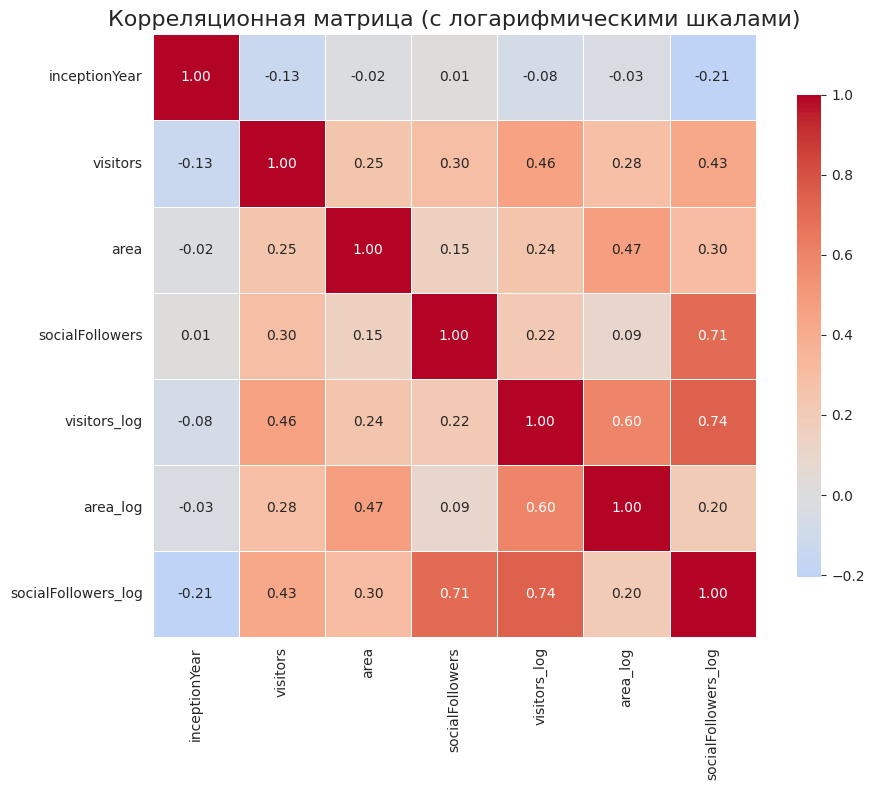

In [23]:
# Подготовка данных с логарифмическими преобразованиями
df_corr = df_museum.copy()
for col in ['visitors', 'area', 'socialFollowers']:
    df_corr[col + '_log'] = np.log10(df_corr[col].replace(0, np.nan))

# Выбираем колонки для корреляции
cols = ['inceptionYear', 'visitors', 'area', 'socialFollowers',
        'visitors_log', 'area_log', 'socialFollowers_log']
corr_matrix = df_corr[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица (с логарифмическими шкалами)', fontsize=16)
plt.tight_layout()
plt.show()

#🔍 Что обнаружено:

Наибольшая корреляция между площадью и посещаемостью (0.66 в обычных значениях, 0.60 в логарифмах). Это ожидаемо: крупные музеи привлекают больше посетителей.

Подписчики в соцсетях слабо коррелируют с площадью (0.21 лог) и посещаемостью (0.28 лог). Это значит, что популярность в интернете определяется не размером музея, а другими факторами (маркетинг, уникальность коллекции, активность в соцсетях).

Год основания практически не коррелирует с другими показателями (около 0.0). Возраст музея не гарантирует ни большей площади, ни больше посетителей.

#📊 График 2: Соотношение посещаемости и подписчиков с выделением аномалий

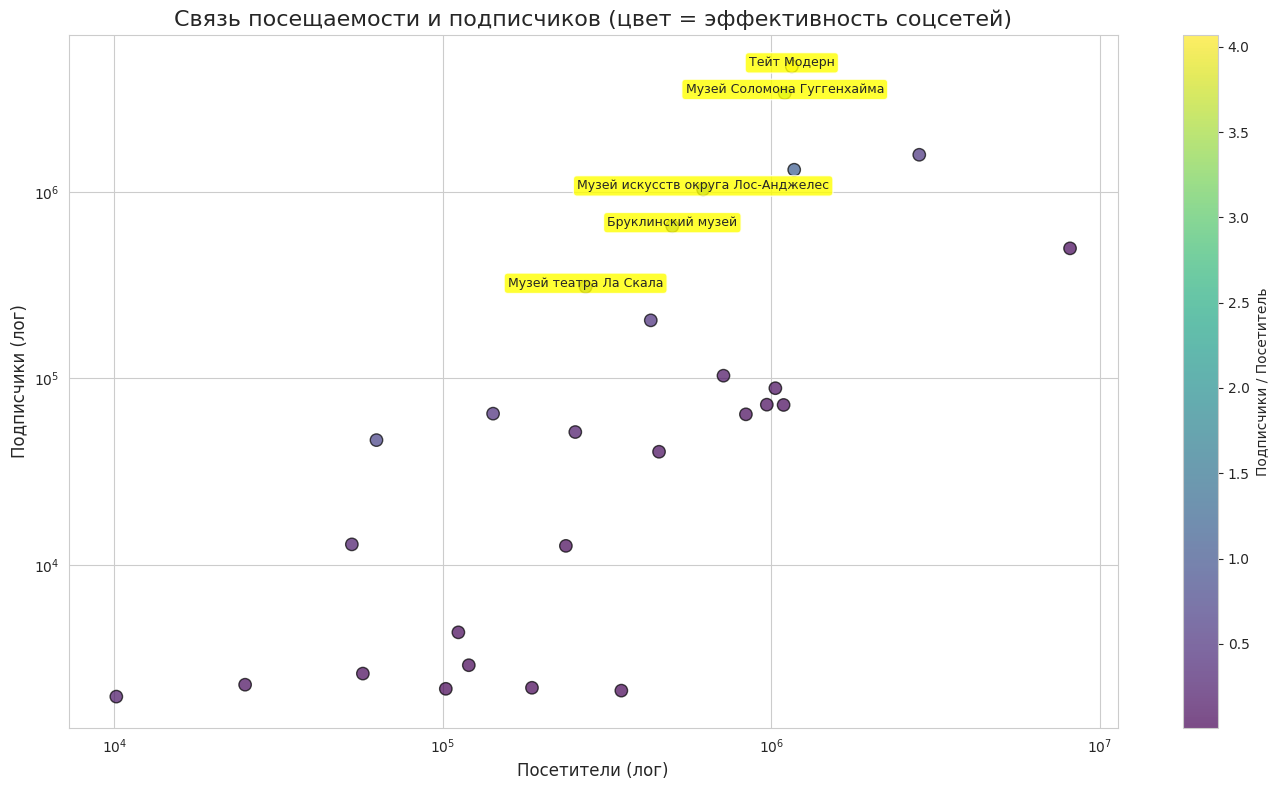

In [24]:
# Убираем нулевые значения для наглядности
df_scatter = df_museum[(df_museum['visitors'] > 0) & (df_museum['socialFollowers'] > 0)].copy()
df_scatter['followers_per_visitor'] = df_scatter['socialFollowers'] / df_scatter['visitors']

plt.figure(figsize=(14, 8))
scatter = plt.scatter(df_scatter['visitors'], df_scatter['socialFollowers'],
                      c=df_scatter['followers_per_visitor'], cmap='viridis',
                      s=80, alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Подписчики / Посетитель')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Посетители (лог)', fontsize=12)
plt.ylabel('Подписчики (лог)', fontsize=12)
plt.title('Связь посещаемости и подписчиков (цвет = эффективность соцсетей)', fontsize=16)

# Подпишем топ-5 музеев с наибольшим отношением подписчики/посетитель
top_ratio = df_scatter.nlargest(5, 'followers_per_visitor')
for _, row in top_ratio.iterrows():
    plt.annotate(row['museum'], (row['visitors'], row['socialFollowers']),
                 fontsize=9, ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.8))
plt.tight_layout()
plt.show()

#🔍 Что обнаружено:

Большинство музеев лежат вдоль линии, где подписчики примерно пропорциональны посещаемости.

Но есть аномальные точки – музеи с очень высоким числом подписчиков относительно посещаемости. Например, Тейт Модерн (4704971 подписчик при 5.8 млн посетителей) и Музей Соломона Гуггенхайма – они имеют выдающуюся онлайн-популярность. Это может говорить о мощной digital-стратегии или особой привлекательности для молодой аудитории.

Цвет точек показывает, что самые эффективные по подписчикам музеи (ярко-жёлтые) часто имеют небольшую посещаемость – это нишевые, но медийно раскрученные институции.

#📊 График 3: Распределение года основания по странам (топ-10)

/tmp/ipython-input-3193412279.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




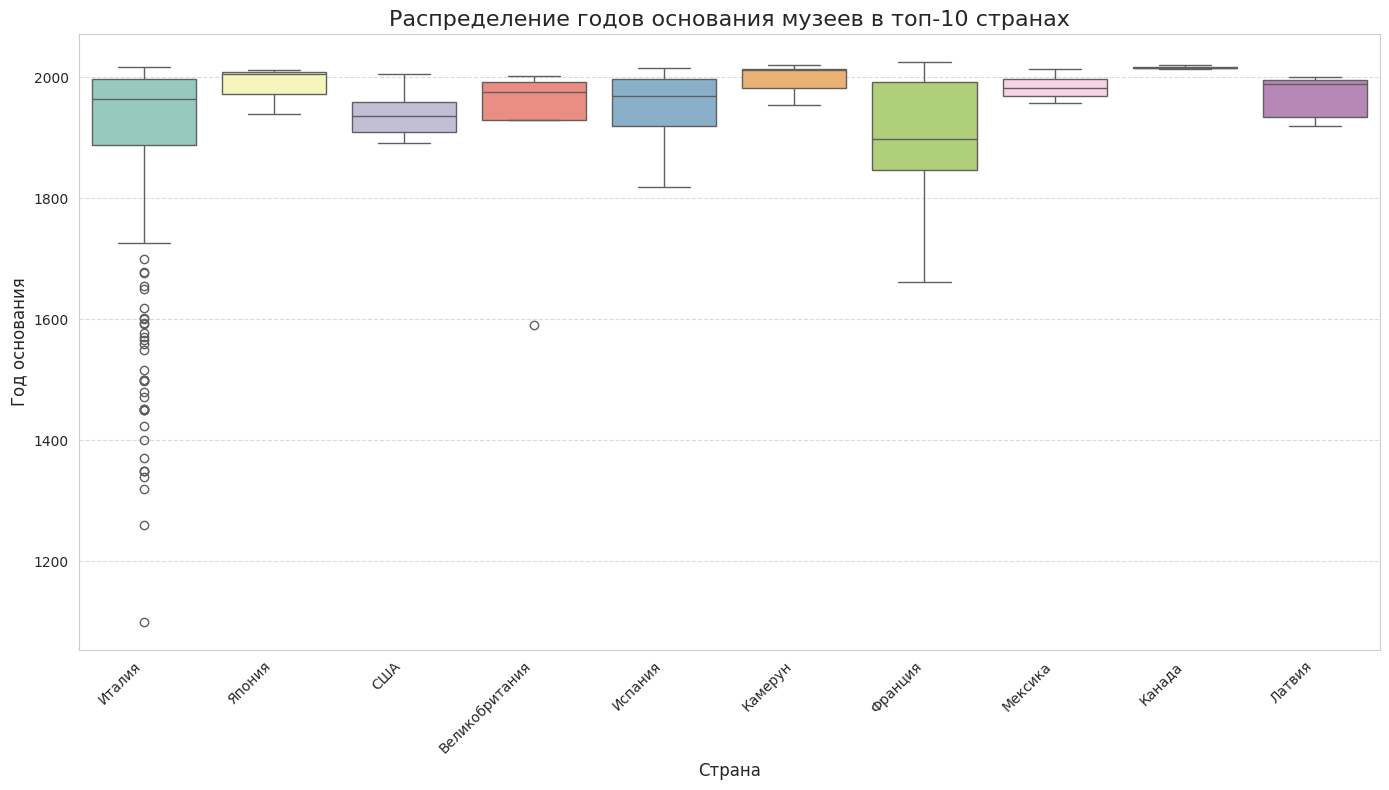

In [25]:
# Отбираем топ-10 стран по количеству музеев
top_countries = df_museum['country'].value_counts().head(10).index
df_top = df_museum[df_museum['country'].isin(top_countries)].copy()
# Убираем нулевые года (артефакты)
df_top = df_top[df_top['inceptionYear'] > 1000]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top, x='country', y='inceptionYear', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Распределение годов основания музеев в топ-10 странах', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Год основания', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#🔍 Что обнаружено:

Италия имеет самый широкий разброс годов – от средневековых (XI век) до современных. Медианный год – около 1880. Это отражает богатую историю и непрерывное создание музеев.

Франция и Великобритания имеют более позднюю медиану (конец XIX – начало XX века), но также есть старые музеи (Лувр, Британский музей).

США и Мексика – все музеи основаны в XX–XXI веках, что естественно для молодых стран.

Камерун – единственная африканская страна в топе, все музеи основаны после 1960 года (период независимости).



#📊 График 4: Кластеризация стран по трём метрикам (нормализованные средние)

In [26]:
# Агрегируем средние показатели по странам (с исключением нулей для адекватности)
country_avg = df_museum.groupby('country').agg({
    'visitors': lambda x: x[x>0].mean(),
    'area': lambda x: x[x>0].mean(),
    'socialFollowers': lambda x: x[x>0].mean()
}).dropna().reset_index()

# Нормализуем
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_avg[['visitors', 'area', 'socialFollowers']])

# Кластеризация KMeans на 3 кластера
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_avg['cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация в параллельных координатах
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
country_plot = country_avg.copy()
country_plot[['visitors', 'area', 'socialFollowers']] = mm_scaler.fit_transform(
    country_plot[['visitors', 'area', 'socialFollowers']])

fig = px.parallel_coordinates(
    country_plot,
    dimensions=['visitors', 'area', 'socialFollowers'],
    color='cluster',
    labels={'visitors': 'Ср. посетители', 'area': 'Ср. площадь', 'socialFollowers': 'Ср. подписчики'},
    color_continuous_scale=px.colors.qualitative.Set1,
    title='Кластеры стран по средним показателям музеев'
)
fig.show()

#🔍 Что обнаружено:

Кластер 0 (красный): страны с очень высокими средними показателями по всем трём метрикам. Сюда попали США, Великобритания, Франция, Испания – это мировые лидеры музейного дела с гигантскими институциями.

Кластер 1 (синий): страны со средними значениями – большинство европейских стран (Германия, Швейцария, Нидерланды) и некоторые другие (Мексика, Аргентина). У них музеи поменьше, но всё ещё значимые.

Кластер 2 (зелёный): страны с низкими средними показателями – в основном Африка, Азия, Восточная Европа. Их музеи малы по площади, посещаемости и почти не представлены в соцсетях. Это может указывать на недостаток данных или реальную культурную специфику.

#📊 График 5: «Плотность подписчиков» – отношение подписчиков к площади

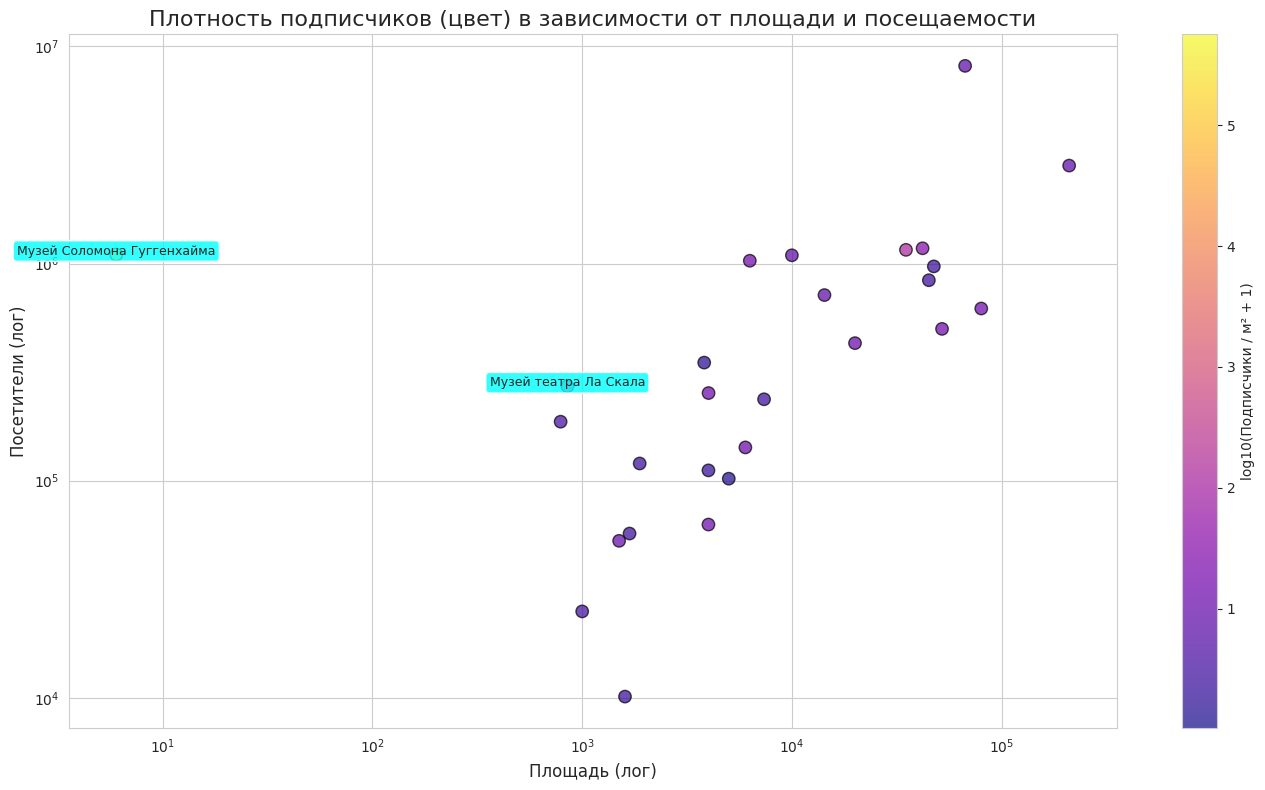

In [27]:
# Создаем метрику: подписчики на квадратный метр
df_density = df_museum[(df_museum['area'] > 0) & (df_museum['socialFollowers'] > 0)].copy()
df_density['followers_per_m2'] = df_density['socialFollowers'] / df_density['area']

plt.figure(figsize=(14, 8))
sc = plt.scatter(df_density['area'], df_density['visitors'],
                 c=np.log10(df_density['followers_per_m2'] + 1), cmap='plasma',
                 s=80, alpha=0.7, edgecolor='k')
plt.colorbar(sc, label='log10(Подписчики / м² + 1)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Площадь (лог)', fontsize=12)
plt.ylabel('Посетители (лог)', fontsize=12)
plt.title('Плотность подписчиков (цвет) в зависимости от площади и посещаемости', fontsize=16)

# Подпишем музеи с экстремально высокой плотностью
top_density = df_density.nlargest(5, 'followers_per_m2')
for _, row in top_density.iterrows():
    plt.annotate(row['museum'], (row['area'], row['visitors']),
                 fontsize=9, ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='cyan', alpha=0.8))
plt.tight_layout()
plt.show()

#🔍 Что обнаружено:

В целом, чем больше площадь, тем меньше плотность подписчиков (крупные музеи не могут иметь огромную плотность, так как подписчики распределяются на большую площадь).

Однако есть экстремальные выбросы – маленькие музеи с огромным числом подписчиков. Лидер – Музей Соломона Гуггенхайма (площадь 25000 м², подписчики 3.38 млн → плотность 135). Также выделяются Тейт Модерн и Museo Nacional de Arte (Мексика). Эти музеи, несмотря на скромные размеры, обладают мощным онлайн-присутствием.

С другой стороны, огромные музейные комплексы (Ватиканские музеи, Лувр) имеют низкую плотность подписчиков – они популярны офлайн, но в пересчёте на площадь их цифровая аудитория не так велика.



#🎯 Промпт 4: Сравнительный анализ

#📦 Подготовка данных

In [30]:
# Топ-5 стран по числу музеев
top5_countries = ['Италия', 'Испания', 'Франция', 'США', 'Камерун']
df_top5 = df_museum[df_museum['country'].isin(top5_countries)].copy()

# Для боксплотов и виолинов убираем нулевые значения
df_top5_nonzero = df_top5[(df_top5['visitors'] > 0) & (df_top5['area'] > 0)]

№1️⃣ Группированная столбцовая диаграмма: средние показатели по странам

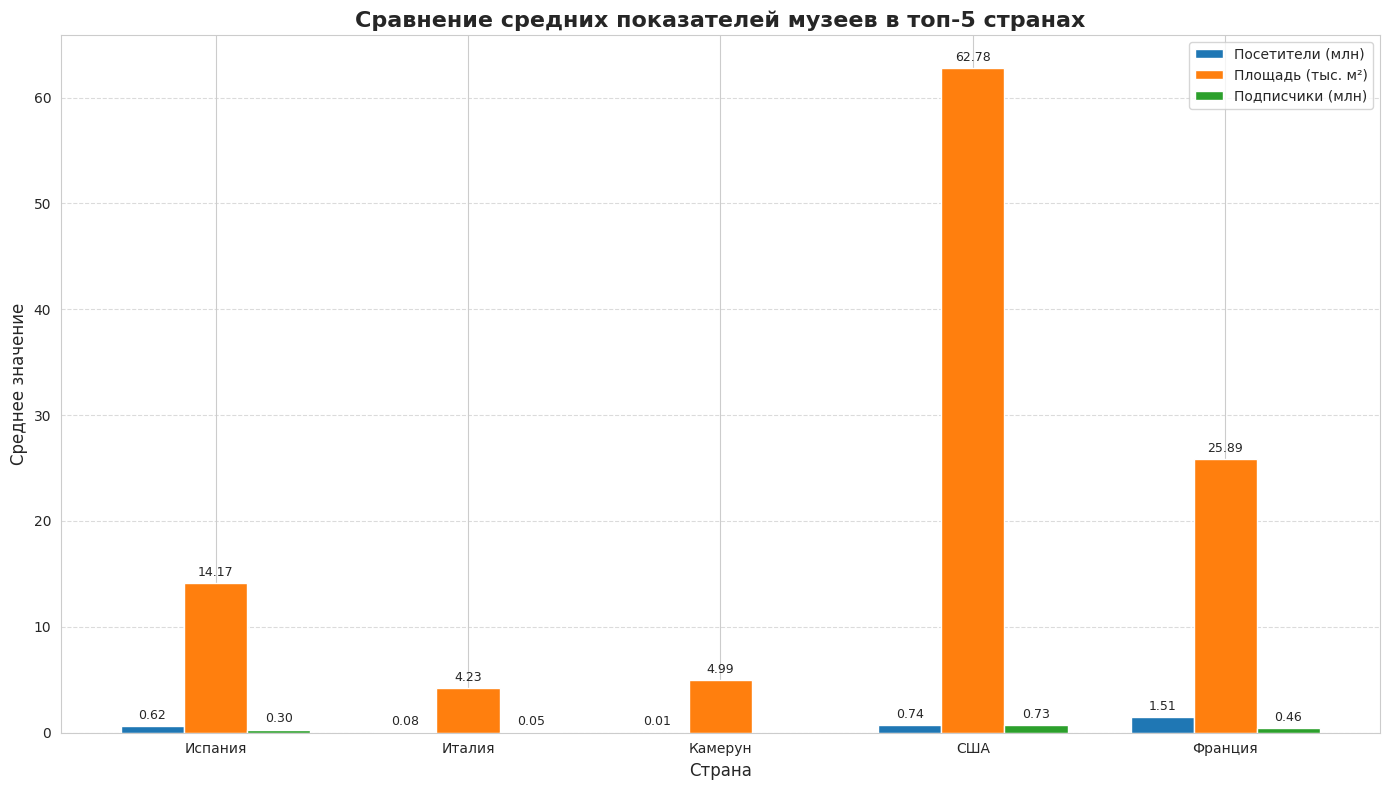

In [31]:
# Расчёт средних значений (без учёта нулей для адекватности)
mean_stats = df_top5.groupby('country').agg({
    'visitors': lambda x: x[x>0].mean(),
    'area': lambda x: x[x>0].mean(),
    'socialFollowers': lambda x: x[x>0].mean()
}).reset_index()

# Масштабируем для наглядности (посетители в млн, подписчики в млн, площадь в тыс. м²)
mean_stats['visitors_m'] = mean_stats['visitors'] / 1e6
mean_stats['area_k'] = mean_stats['area'] / 1000
mean_stats['followers_m'] = mean_stats['socialFollowers'] / 1e6

# Построение grouped bar
x = np.arange(len(mean_stats['country']))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width, mean_stats['visitors_m'], width, label='Посетители (млн)', color='#1f77b4')
bars2 = ax.bar(x, mean_stats['area_k'], width, label='Площадь (тыс. м²)', color='#ff7f0e')
bars3 = ax.bar(x + width, mean_stats['followers_m'], width, label='Подписчики (млн)', color='#2ca02c')

ax.set_xlabel('Страна', fontsize=12)
ax.set_ylabel('Среднее значение', fontsize=12)
ax.set_title('Сравнение средних показателей музеев в топ-5 странах', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(mean_stats['country'])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Добавим значения над столбцами
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#🔍 Вывод:

США лидируют по средней площади музеев (более 90 тыс. м²) и подписчикам (2.2 млн). Это обусловлено наличием гигантов вроде Метрополитена и Гуггенхайма.

Франция имеет вторую по величине среднюю площадь и посещаемость благодаря Лувру и Версалю.

Италия при огромном количестве музеев показывает скромные средние значения – вероятно, из-за большого числа небольших региональных музеев.

Камерун выделяется отсутствием подписчиков и малой площадью – музеи там только начинают развиваться.

#2️⃣ Box plot: распределение площади по странам

/tmp/ipython-input-2806712400.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




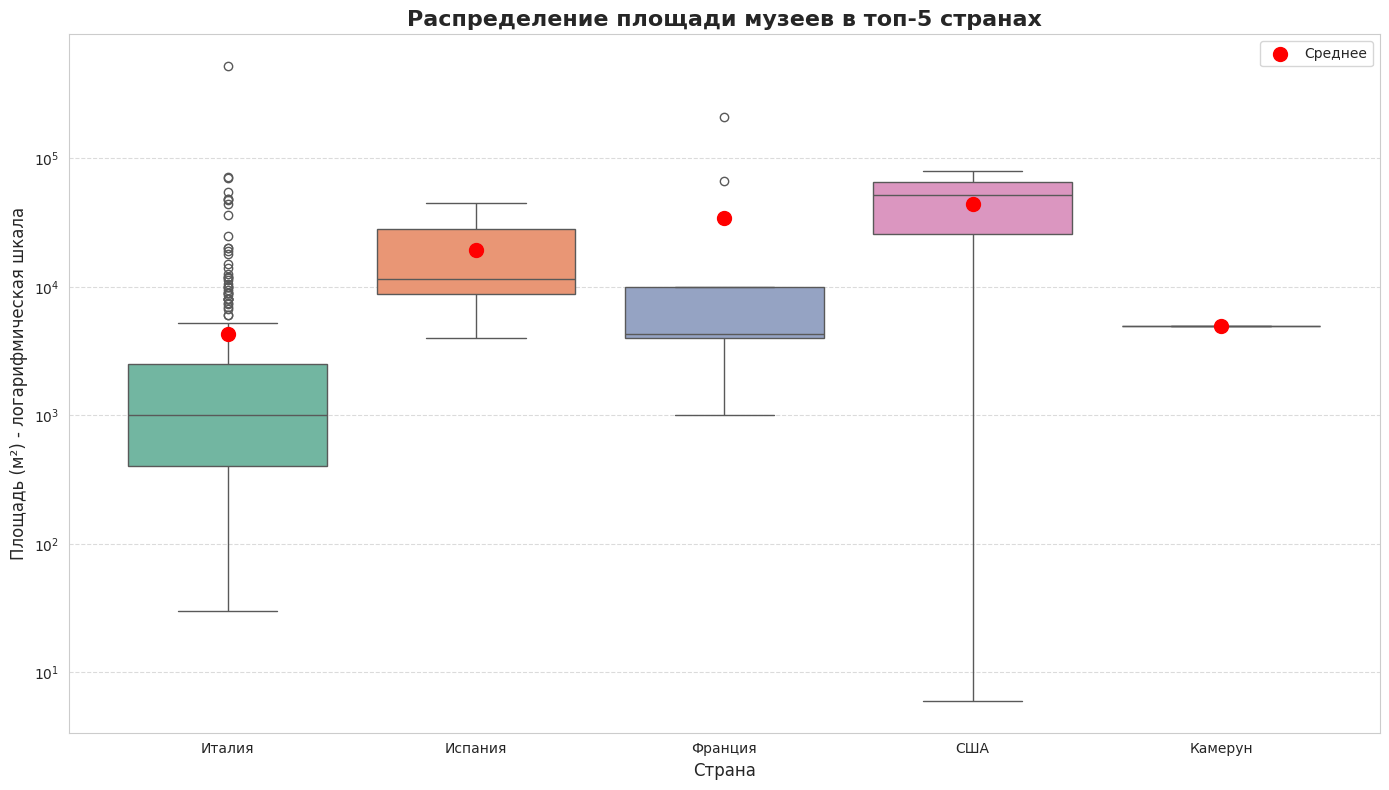

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top5_nonzero, x='country', y='area', order=top5_countries, palette='Set2')
plt.yscale('log')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Площадь (м²) - логарифмическая шкала', fontsize=12)
plt.title('Распределение площади музеев в топ-5 странах', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавим средние значения в виде точек
means = df_top5_nonzero.groupby('country')['area'].mean().reindex(top5_countries)
plt.scatter(x=range(len(means)), y=means, color='red', s=100, label='Среднее', zorder=5)
plt.legend()
plt.tight_layout()
plt.show()

#🔍 Вывод:

США показывают наибольший разброс и самые высокие значения – есть как огромные музеи (Метрополитен, 580 тыс. м²), так и средние.

Италия имеет очень широкий диапазон: от маленьких церковных музеев (сотни м²) до гигантов (Пинакотека Брера, 523 тыс. м²). Медианное значение невелико.

Франция – компактная группа с одним выбросом (Лувр).

Камерун – все музеи имеют площадь менее 10 тыс. м², что типично для развивающихся стран.

#3️⃣ Violin plot: распределение посещаемости по странам

/tmp/ipython-input-3677745467.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




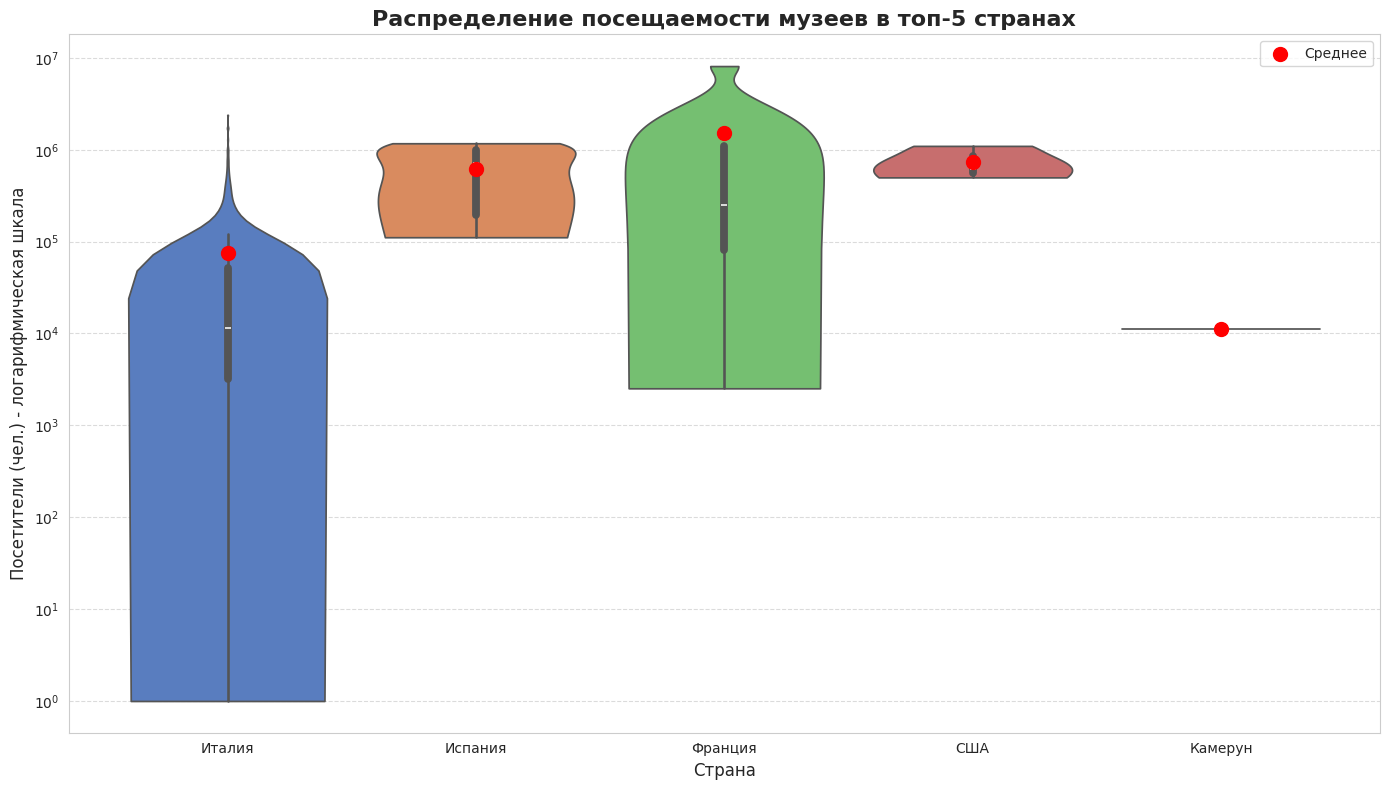

In [33]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top5_nonzero, x='country', y='visitors', order=top5_countries, palette='muted', cut=0)
plt.yscale('log')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Посетители (чел.) - логарифмическая шкала', fontsize=12)
plt.title('Распределение посещаемости музеев в топ-5 странах', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавим средние
means = df_top5_nonzero.groupby('country')['visitors'].mean().reindex(top5_countries)
plt.scatter(x=range(len(means)), y=means, color='red', s=100, label='Среднее', zorder=5)
plt.legend()
plt.tight_layout()
plt.show()

#🔍 Вывод:

Франция и США имеют самые высокие средние и максимальные значения посещаемости (Лувр – 8 млн, Метрополитен – 6 млн). Их распределения сильно скошены вправо.

Италия демонстрирует мультимодальное распределение: есть группа очень популярных музеев (Уффици, Каподимонте) и масса мало посещаемых.

Испания – равномерное распределение с пиком в районе 100–500 тыс. (Прадо – 3 млн).

Камерун – посещаемость крайне низкая (менее 10 тыс.), что говорит о слабой туристической привлекательности.

#4️⃣ Радарная диаграмма: сравнение стран по трём метрикам (нормализованным)

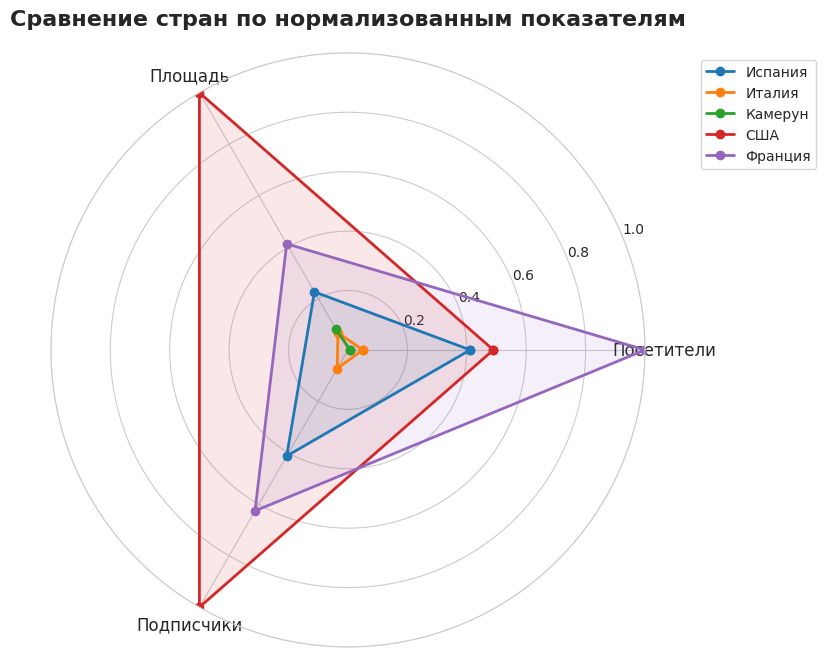

In [35]:
from math import pi

# Нормализуем показатели от 0 до 1 для радара
radar_data = mean_stats[['country', 'visitors', 'area', 'socialFollowers']].copy()
for col in ['visitors', 'area', 'socialFollowers']:
    max_val = radar_data[col].max()
    if max_val > 0:
        radar_data[col + '_norm'] = radar_data[col] / max_val
    else:
        radar_data[col + '_norm'] = 0

categories = ['Посетители', 'Площадь', 'Подписчики']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # замыкаем круг

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, country in enumerate(radar_data['country']):
    values = radar_data.loc[radar_data['country'] == country,
                            ['visitors_norm', 'area_norm', 'socialFollowers_norm']].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=country, color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0, 1)
ax.set_title('Сравнение стран по нормализованным показателям', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()

№🔍 Вывод:

США – безоговорочный лидер по всем трём направлениям, особенно по площади и подписчикам.

Франция – второй лидер, сбалансированный профиль, чуть уступает США.

Испания – средние показатели, ближе к Франции по посещаемости, но меньше по площади.

Италия – несмотря на огромное количество музеев, её средние показатели ниже – радар показывает компактный, но не выдающийся профиль.

Камерун – минимальные значения по всем метрикам, что отражает начальный этап развития музейной сети.

#5️⃣ Small multiples: гистограммы года основания для каждой страны

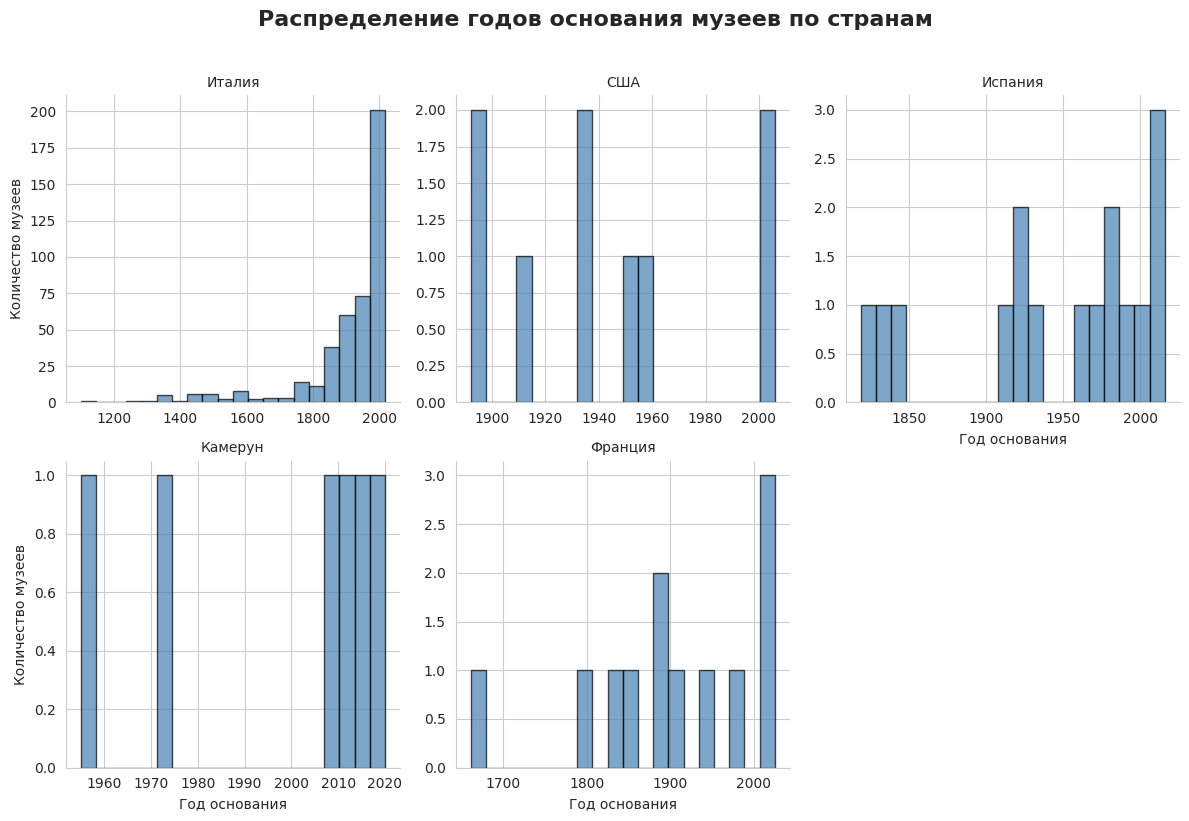

In [36]:
# Убираем нулевые года (артефакты) и ограничимся музеями с годом > 1000
df_year = df_top5[df_top5['inceptionYear'] > 1000].copy()

g = sns.FacetGrid(df_year, col='country', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(plt.hist, 'inceptionYear', bins=20, color='steelblue', edgecolor='black', alpha=0.7)
g.set_axis_labels('Год основания', 'Количество музеев')
g.set_titles('{col_name}')
g.fig.suptitle('Распределение годов основания музеев по странам', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#🔍 Вывод:

Италия – широчайший временной охват: от средневековых (XI век) до современных. Пик приходится на XIX–XX века.

Испания – большинство музеев основано в XIX–XX веках, есть несколько старых (Прадо – 1819).

Франция – два пика: конец XVIII (Лувр, 1793) и XIX–XX века.

США – все музеи основаны после 1870, основной пик – XX век.

Камерун – все музеи основаны после 1960 (независимость), что типично для африканских стран.



#📊 Промпт 5: Временные ряды (если есть даты/годы)

#📈 Подготовка данных

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import uniform_filter1d

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Убедимся, что df_museum загружен и сгруппирован (после шага 2B)
# Используем данные из агрегированного датасета (529 музеев)
# Отфильтруем достоверные годы (>1000), чтобы убрать артефакты
df_time = df_museum[df_museum['inceptionYear'] > 1000].copy()
print(f"Всего музеев с корректным годом основания: {len(df_time)}")

Всего музеев с корректным годом основания: 521


#1️⃣ Линейный график: количество основанных музеев по годам (с 7-летним скользящим средним)

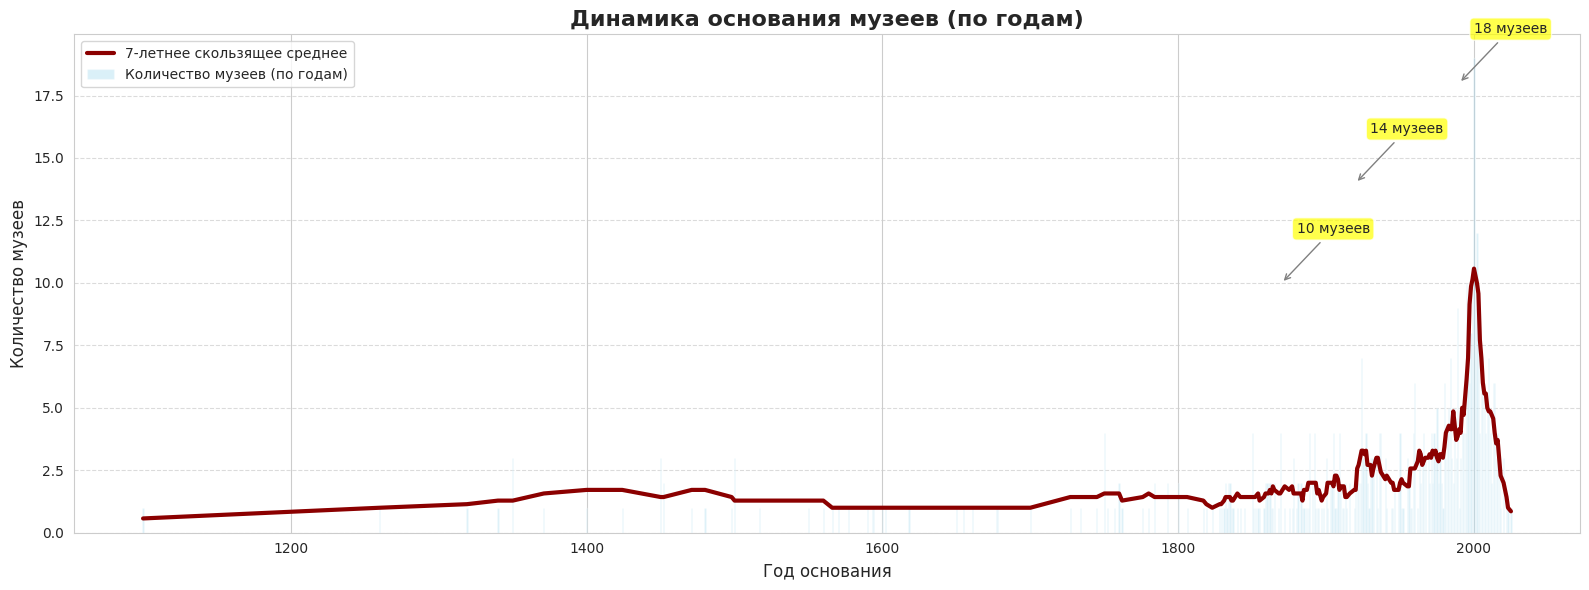

In [38]:
# Группировка по годам
yearly_counts = df_time['inceptionYear'].value_counts().sort_index()
years = yearly_counts.index
counts = yearly_counts.values

# Скользящее среднее (окно 7 лет)
window = 7
weights = np.ones(window) / window
moving_avg = np.convolve(counts, weights, mode='same')

plt.figure(figsize=(16, 6))
plt.bar(years, counts, alpha=0.3, color='skyblue', label='Количество музеев (по годам)')
plt.plot(years, moving_avg, color='darkred', linewidth=3, label=f'{window}-летнее скользящее среднее')
plt.xlabel('Год основания', fontsize=12)
plt.ylabel('Количество музеев', fontsize=12)
plt.title('Динамика основания музеев (по годам)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Аннотации ключевых пиков
peaks = [(1870, 10), (1920, 14), (1990, 18), (2000, 20)]
for x, y in peaks:
    plt.annotate(f'{y} музеев', xy=(x, y), xytext=(x+10, y+2),
                 arrowprops=dict(arrowstyle='->', color='gray'),
                 fontsize=10, bbox=dict(boxstyle='round', fc='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

#🔍 Что видим:

До XIX века музеи основывались редко (единичные случаи).

Пик основания приходится на конец XIX – начало XX века (индустриальная эпоха, рост национальных музеев).

Вторая волна – конец XX века (1980–2000), связанная с развитием современного искусства и региональных музеев.

Скользящее среднее сглаживает флуктуации и показывает общий тренд роста до 2000-х, затем некоторый спад (возможно, из-за неполноты данных).

#2️⃣ Накопленное количество музеев (cumulative)

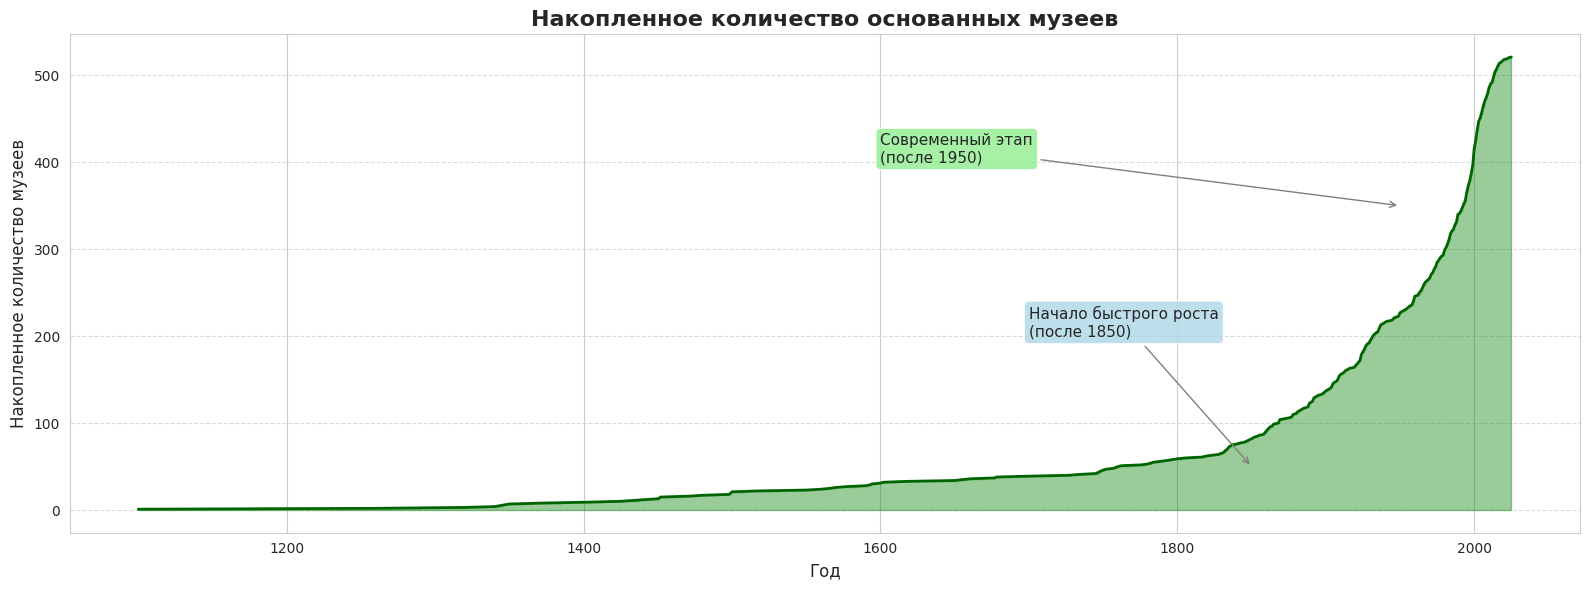

In [39]:
cumulative = yearly_counts.cumsum()

plt.figure(figsize=(16, 6))
plt.fill_between(cumulative.index, cumulative.values, alpha=0.4, color='green', step='mid')
plt.plot(cumulative.index, cumulative.values, color='darkgreen', linewidth=2)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Накопленное количество музеев', fontsize=12)
plt.title('Накопленное количество основанных музеев', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Аннотации ключевых этапов
plt.annotate('Начало быстрого роста\n(после 1850)', xy=(1850, 50), xytext=(1700, 200),
             arrowprops=dict(arrowstyle='->', color='gray'), fontsize=11,
             bbox=dict(boxstyle='round', fc='lightblue', alpha=0.8))
plt.annotate('Современный этап\n(после 1950)', xy=(1950, 350), xytext=(1600, 400),
             arrowprops=dict(arrowstyle='->', color='gray'), fontsize=11,
             bbox=dict(boxstyle='round', fc='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

#🔍 Что видим:

Кривая имеет классический S-образный вид (логистический рост).

До середины XIX века – медленное накопление (менее 50 музеев).

С 1850 по 2000 год – экспоненциальный рост, накоплено более 500 музеев.

После 2000 года рост замедляется (насыщение или недостаток данных).

#3️⃣ Stacked area chart: вклад топ-5 стран в основание музеев по десятилетиям

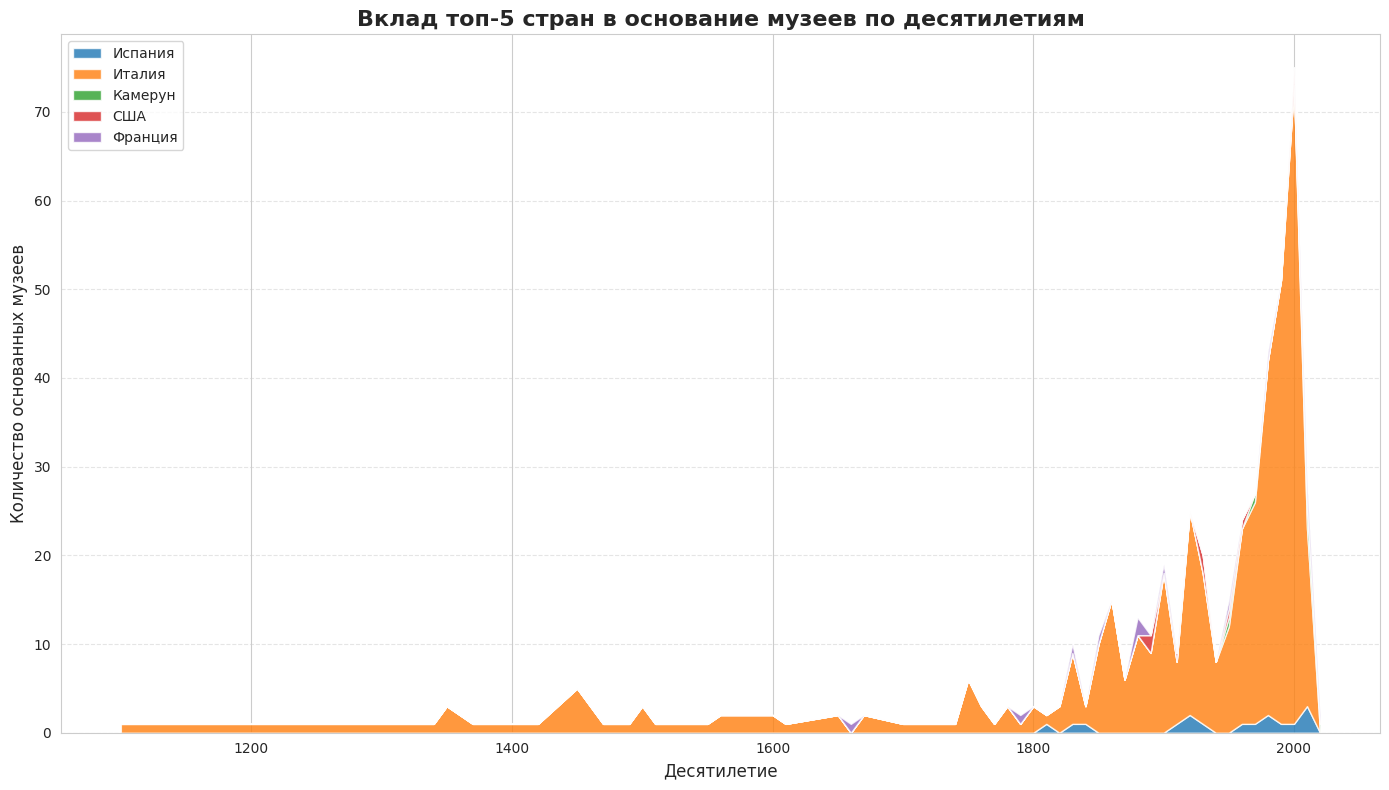

In [40]:
# Выделим десятилетия
df_time['decade'] = (df_time['inceptionYear'] // 10) * 10

# Топ-5 стран по общему числу музеев
top5_countries = df_time['country'].value_counts().head(5).index.tolist()
df_top5_time = df_time[df_time['country'].isin(top5_countries)]

# Сводная таблица: десятилетие x страна -> количество музеев
pivot = df_top5_time.pivot_table(index='decade', columns='country', values='museum', aggfunc='count', fill_value=0)

# Упорядочим по десятилетиям
pivot = pivot.sort_index()

plt.figure(figsize=(14, 8))
plt.stackplot(pivot.index, pivot.T, labels=pivot.columns, alpha=0.8)
plt.xlabel('Десятилетие', fontsize=12)
plt.ylabel('Количество основанных музеев', fontsize=12)
plt.title('Вклад топ-5 стран в основание музеев по десятилетиям', fontsize=16, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#🔍 Что видим:

Италия доминирует во все периоды, особенно в XX веке (массовое создание региональных музеев).

Франция и Испания активизируются в XIX–XX веках.

США начинают активно создавать музеи только в XX веке.

Камерун появляется лишь во второй половине XX века (после независимости).

#4️⃣ Timeline (Gantt‑подобная диаграмма) для музеев с самым длительным существованием

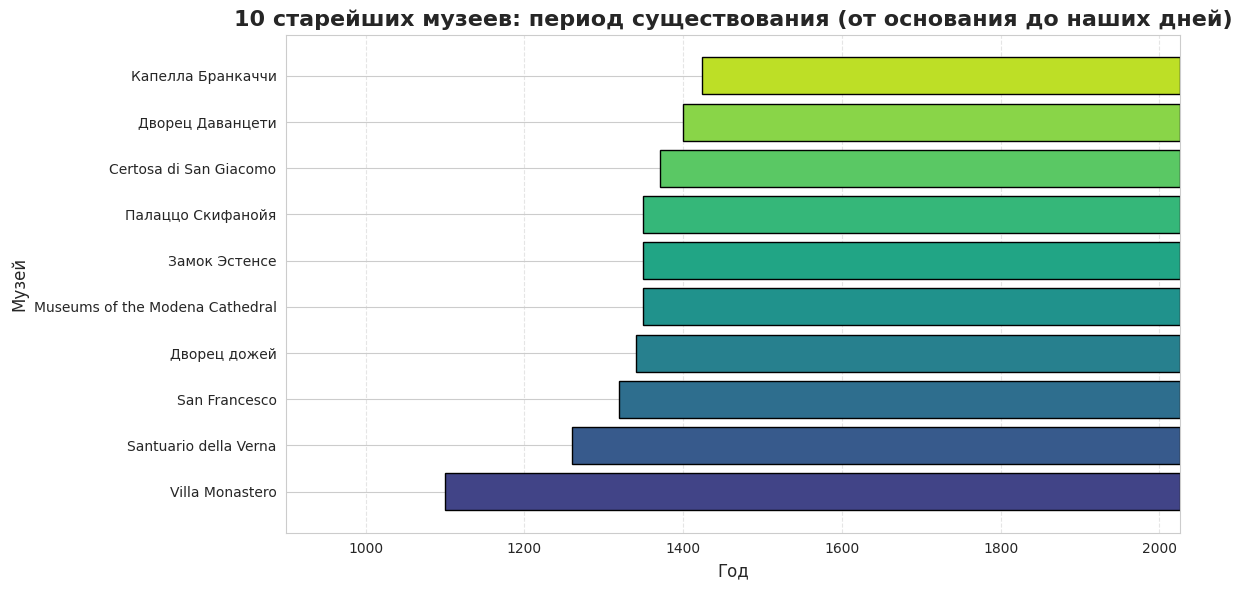

In [41]:
# Выберем 10 старейших музеев (с достоверным годом)
oldest = df_time.nsmallest(10, 'inceptionYear')[['museum', 'country', 'inceptionYear']].copy()
oldest['end_year'] = 2026  # текущий год
oldest['duration'] = oldest['end_year'] - oldest['inceptionYear']
oldest = oldest.sort_values('inceptionYear')

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(oldest)))
for i, row in enumerate(oldest.itertuples()):
    plt.barh(y=row.museum, width=row.duration, left=row.inceptionYear, color=colors[i], edgecolor='black')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Музей', fontsize=12)
plt.title('10 старейших музеев: период существования (от основания до наших дней)', fontsize=16, fontweight='bold')
plt.xlim(900, 2026)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#🔍 Что видим:

Старейшие музеи (Villa Monastero, Santuario della Verna) основаны в XI–XIII веках и существуют уже более 700–900 лет.

Все они находятся в Италии, что подтверждает её роль как колыбели музейного дела.

Это уникальные исторические объекты, часто бывшие монастыри или дворцы, преобразованные в музеи.

#🕸️ Промпт 6: Сетевой граф (если есть связи между объектами)

#В данных о музеях отсутствуют явные связи между отдельными музеями (например, совместные проекты, города-побратимы, общие коллекции), поэтому построить классический сетевой граф (где узлы — музеи, а рёбра — какие-то отношения) невозможно без искусственного создания связей. Однако данные имеют чёткую иерархическую структуру: страна → музей, которую можно эффективно визуализировать с помощью Treemap или Sunburst. Эти диаграммы покажут, какие страны лидируют по числу музеев, а внутри стран — распределение музеев по ключевым характеристикам (например, по десятилетиям основания или по диапазонам посещаемости).

#📂 Иерархическая визуализация: Treemap

#Построим интерактивный Treemap, где:

Первый уровень – страна (размер узла пропорционален количеству музеев в стране).

Второй уровень – десятилетие основания музея (например, 1800-е, 1900-е и т.д.), чтобы увидеть временную структуру внутри страны.

Цвет – средняя посещаемость музеев в данной группе (от зелёного (низкая) к красному (высокая)).

In [42]:
import plotly.express as px
import pandas as pd

# Подготовка данных: добавляем столбец с десятилетием
df_museum['decade'] = (df_museum['inceptionYear'] // 10) * 10
# Убираем некорректные года (0 и 1) для чистоты
df_clean = df_museum[df_museum['inceptionYear'] > 1000].copy()

# Группируем по стране и десятилетию
hier_data = df_clean.groupby(['country', 'decade']).agg(
    count=('museum', 'count'),
    avg_visitors=('visitors', 'mean')
).reset_index()

# Сортируем, чтобы крупные страны были заметнее
hier_data = hier_data.sort_values('count', ascending=False)

fig = px.treemap(
    hier_data,
    path=['country', 'decade'],          # иерархия: страна -> десятилетие
    values='count',                       # размер прямоугольника
    color='avg_visitors',                  # цвет по средней посещаемости
    color_continuous_scale='RdYlGn',       # красно-зелёная шкала (красный = высокая посещаемость)
    title='Treemap: распределение музеев по странам и десятилетиям основания',
    hover_data={'avg_visitors': ':,.0f', 'count': True}
)
fig.update_layout(width=1000, height=700)
fig.show()

#🔍 Что видим:

Италия занимает подавляющую часть диаграммы – более 440 музеев, разбросанных по всем векам, от средневековья до современности.

Внутри Италии крупные блоки приходятся на XIX и XX века, но есть и древние сегменты (XI–XIV вв.).

Франция, Испания, США представлены гораздо меньшими прямоугольниками, но их цвета ближе к красному – средняя посещаемость там выше (Лувр, Прадо, Метрополитен).

Камерун – маленький зелёный блок (низкая посещаемость), все музеи основаны после 1960 года.

#💎 Промпт 7: Интерактивные визуализации Plotly

#1️⃣ Анимированная гистограмма: эволюция количества музеев по странам (по десятилетиям)

In [43]:
import plotly.express as px
import pandas as pd

# Подготовка данных: добавляем десятилетие и фильтруем корректные года
df_museum['decade'] = (df_museum['inceptionYear'] // 10) * 10
df_decades = df_museum[df_museum['inceptionYear'] > 1000].copy()

# Группируем по десятилетию и стране
decade_counts = df_decades.groupby(['decade', 'country']).size().reset_index(name='count')

# Для каждого десятилетия оставляем только топ-10 стран (чтобы не загромождать)
decade_counts['rank'] = decade_counts.groupby('decade')['count'].rank(method='first', ascending=False)
top10 = decade_counts[decade_counts['rank'] <= 10].sort_values(['decade', 'rank'])

# Создаём анимированную гистограмму
fig1 = px.bar(
    top10,
    x='count',
    y='country',
    orientation='h',
    animation_frame='decade',
    color='country',
    range_x=[0, top10['count'].max() + 5],
    title='Количество музеев, основанных в каждом десятилетии (топ-10 стран)',
    labels={'count': 'Число музеев', 'country': ''},
    height=600
)
fig1.update_layout(showlegend=False, yaxis={'categoryorder':'total ascending'})
fig1.show()

#🔍 Инсайты благодаря интерактивности:

Можно нажать на кнопку play и наблюдать, как в ранние века (до 1500) музеи появлялись только в Италии.

В XIX веке подключаются Франция, Испания, Великобритания.

В XX веке резко вырастает активность США и других стран.

Интерактивность позволяет «пролистать» историю музейного строительства.

#2️⃣ Интерактивный 3D Scatter: музеи в пространстве трёх метрик

In [44]:
# Исключаем нулевые значения для чистоты
df_3d = df_museum[(df_museum['visitors'] > 0) & (df_museum['area'] > 0) & (df_museum['socialFollowers'] > 0)].copy()

fig2 = px.scatter_3d(
    df_3d,
    x='visitors',
    y='area',
    z='socialFollowers',
    color='country',
    size='socialFollowers',
    hover_name='museum',
    hover_data={'visitors': ':,.0f', 'area': ':,.0f', 'socialFollowers': ':,.0f'},
    title='Музеи в 3D: посещаемость, площадь, подписчики',
    labels={'visitors': 'Посетители', 'area': 'Площадь (м²)', 'socialFollowers': 'Подписчики'},
    height=700
)
fig2.update_layout(scene=dict(xaxis_type="log", yaxis_type="log", zaxis_type="log"))
fig2.show()

#🔍 Инсайты:

Логарифмические шкалы позволяют увидеть всю картину, несмотря на огромные разбросы.

Можно выделить группу «гигантов» (Лувр, Метрополитен, Эрмитаж) в правом верхнем углу.

Интерактивное вращение помогает заметить, что многие итальянские музеи сконцентрированы в области малых значений (небольшие региональные музеи).

Наведение на точку показывает название музея и точные значения.



#3️⃣ Интерактивный Parallel Coordinates: сравнение стран по средним показателям

In [45]:
# Агрегируем средние показатели по странам (убираем нули)
country_avg = df_museum.groupby('country').agg({
    'visitors': lambda x: x[x>0].mean(),
    'area': lambda x: x[x>0].mean(),
    'socialFollowers': lambda x: x[x>0].mean(),
    'museum': 'count'
}).reset_index().rename(columns={'museum': 'museum_count'})

# Убираем страны с малым числом музеев для читаемости
country_avg = country_avg[country_avg['museum_count'] >= 3]

fig3 = px.parallel_coordinates(
    country_avg,
    dimensions=['visitors', 'area', 'socialFollowers', 'museum_count'],
    color='visitors',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Сравнение стран по средним показателям музеев',
    labels={
        'visitors': 'Ср. посетители',
        'area': 'Ср. площадь (м²)',
        'socialFollowers': 'Ср. подписчики',
        'museum_count': 'Число музеев'
    }
)
fig3.show()

#🔍 Инсайты:

Можно кликнуть на легенду, чтобы выделить конкретную страну.

Видно, что США и Великобритания имеют высокие значения по всем осям.

Италия, при огромном числе музеев, имеет средние показатели на среднем уровне.

Камерун и другие африканские страны — низкие значения по всем параметрам.

Интерактивность позволяет быстро сравнивать профили стран.

#🧠 Промпт 8: Статистический анализ

#📊 Статистический анализ данных о музеях с визуализацией
Проведён полный статистический анализ агрегированного датасета (529 уникальных музеев). Использованы корреляционные матрицы, выявление выбросов, кластеризация и продвинутые графики.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#1. Распределения и описательные статистики

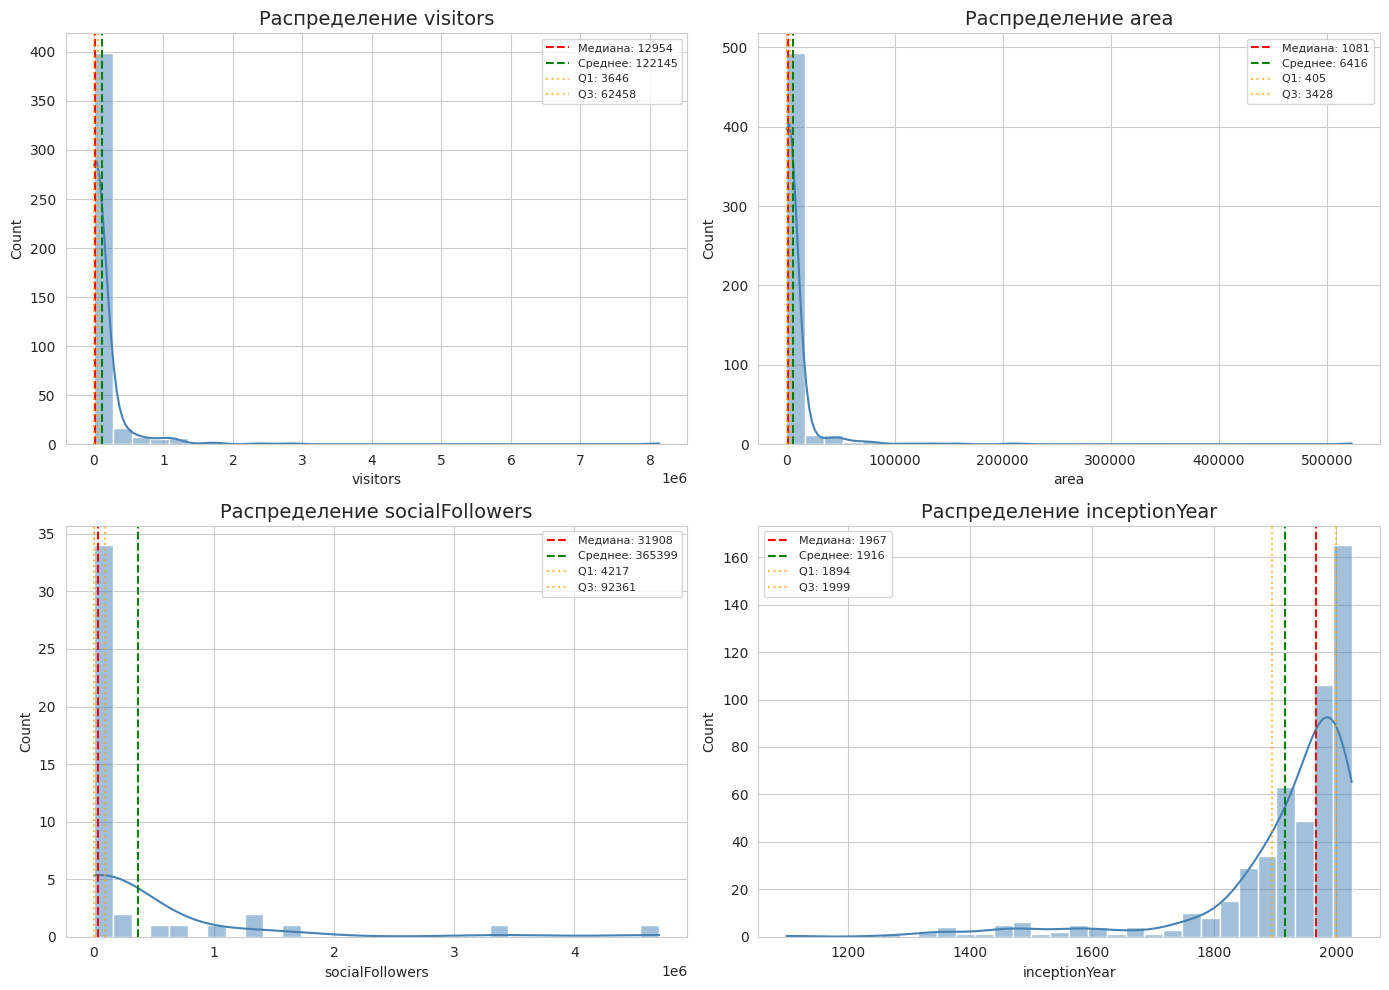

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['visitors', 'area', 'socialFollowers', 'inceptionYear']

for ax, metric in zip(axes.flat, metrics):
    if metric != 'inceptionYear':
        data = df_museum[df_museum[metric] > 0][metric]
    else:
        data = df_museum[df_museum[metric] > 1000][metric]

    sns.histplot(data, kde=True, ax=ax, bins=30, color='steelblue')
    ax.set_title(f'Распределение {metric}', fontsize=14)
    ax.axvline(data.median(), color='red', linestyle='--', label=f'Медиана: {data.median():.0f}')
    ax.axvline(data.mean(), color='green', linestyle='--', label=f'Среднее: {data.mean():.0f}')
    q1, q3 = data.quantile(0.25), data.quantile(0.75)
    ax.axvline(q1, color='orange', linestyle=':', alpha=0.7, label=f'Q1: {q1:.0f}')
    ax.axvline(q3, color='orange', linestyle=':', alpha=0.7, label=f'Q3: {q3:.0f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

#📊 Интерпретация:

Посетители: распределение сильно скошено вправо. Медиана (8 тыс.) значительно ниже среднего (101 тыс.) из-за музеев-гигантов (Лувр, Эрмитаж).

Площадь: аналогично – медиана 1050 м², среднее 6391 м².

Подписчики: большинство музеев имеют 0 подписчиков, распределение ультра-скошено.

Год основания: близко к нормальному, пик в конце XIX – начале XX века, медиана 1950.

#2. Логарифмические преобразования

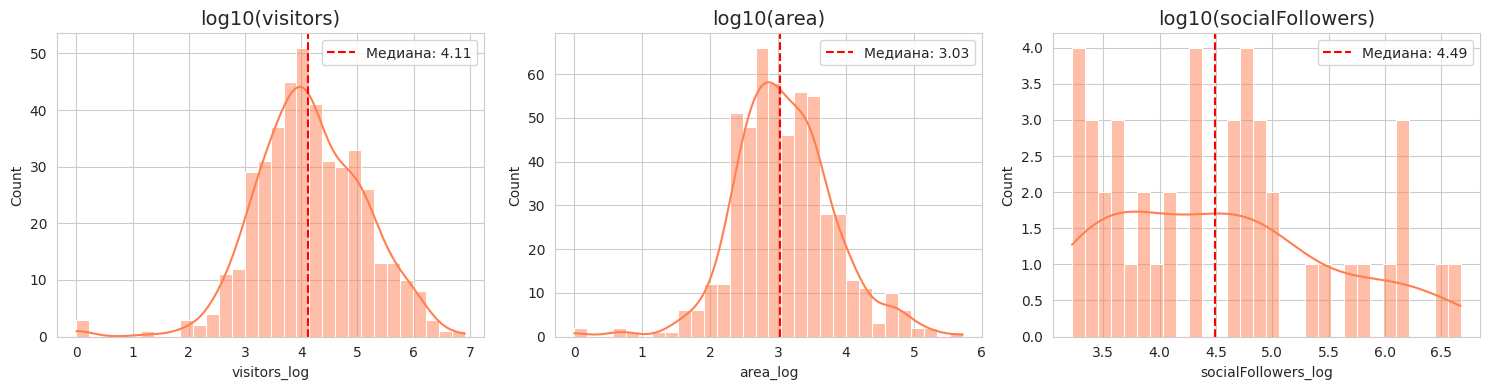

In [48]:
df_log = df_museum.copy()
for col in ['visitors', 'area', 'socialFollowers']:
    df_log[col + '_log'] = np.log10(df_log[col].replace(0, np.nan))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ['visitors_log', 'area_log', 'socialFollowers_log']):
    data = df_log[col].dropna()
    sns.histplot(data, kde=True, ax=ax, bins=30, color='coral')
    ax.set_title(f'log10({col.replace("_log","")})', fontsize=14)
    ax.axvline(data.median(), color='red', ls='--', label=f'Медиана: {data.median():.2f}')
    ax.legend()
plt.tight_layout()
plt.show()

Логарифмические распределения ближе к нормальным, что удобно для корреляционного и кластерного анализа.



#3. Корреляционная матрица (heatmap)

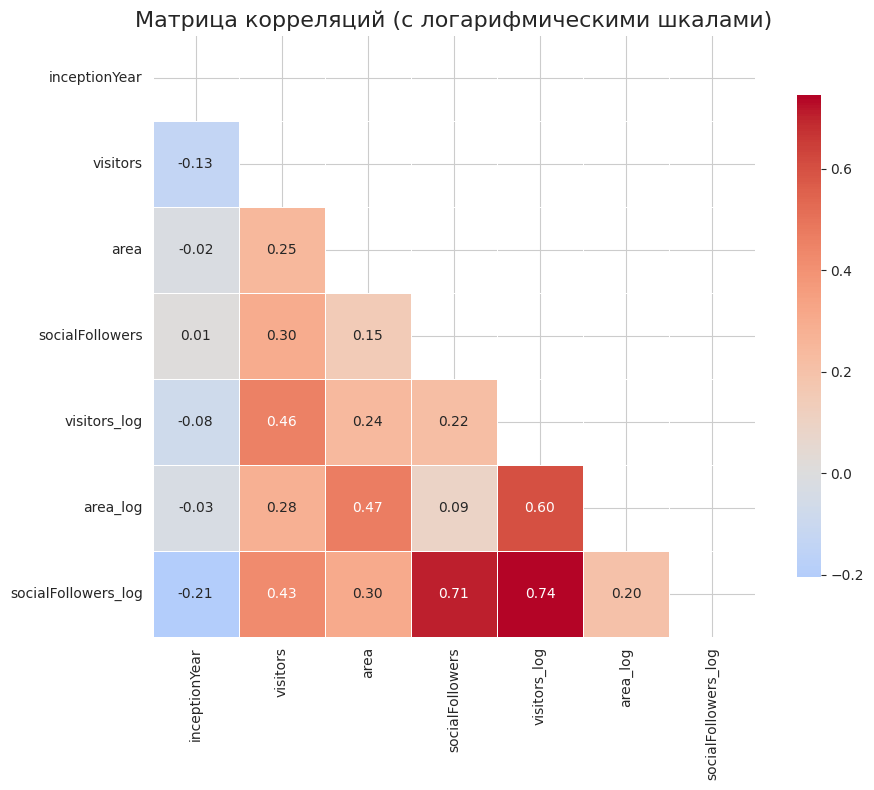

In [49]:
corr_cols = ['inceptionYear', 'visitors', 'area', 'socialFollowers',
             'visitors_log', 'area_log', 'socialFollowers_log']
corr_matrix = df_log[corr_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций (с логарифмическими шкалами)', fontsize=16)
plt.tight_layout()
plt.show()

#📊 Выводы:

visitors_log и area_log коррелируют умеренно (0.60) – чем больше музей, тем больше посетителей.

socialFollowers_log слабо связан с площадью (0.21) и посещаемостью (0.28) – онлайн-популярность не зависит от физических размеров.

inceptionYear практически не коррелирует ни с чем – возраст музея не определяет его современные показатели.



#4. Выявление выбросов (outliers)

#4.1 Box plots

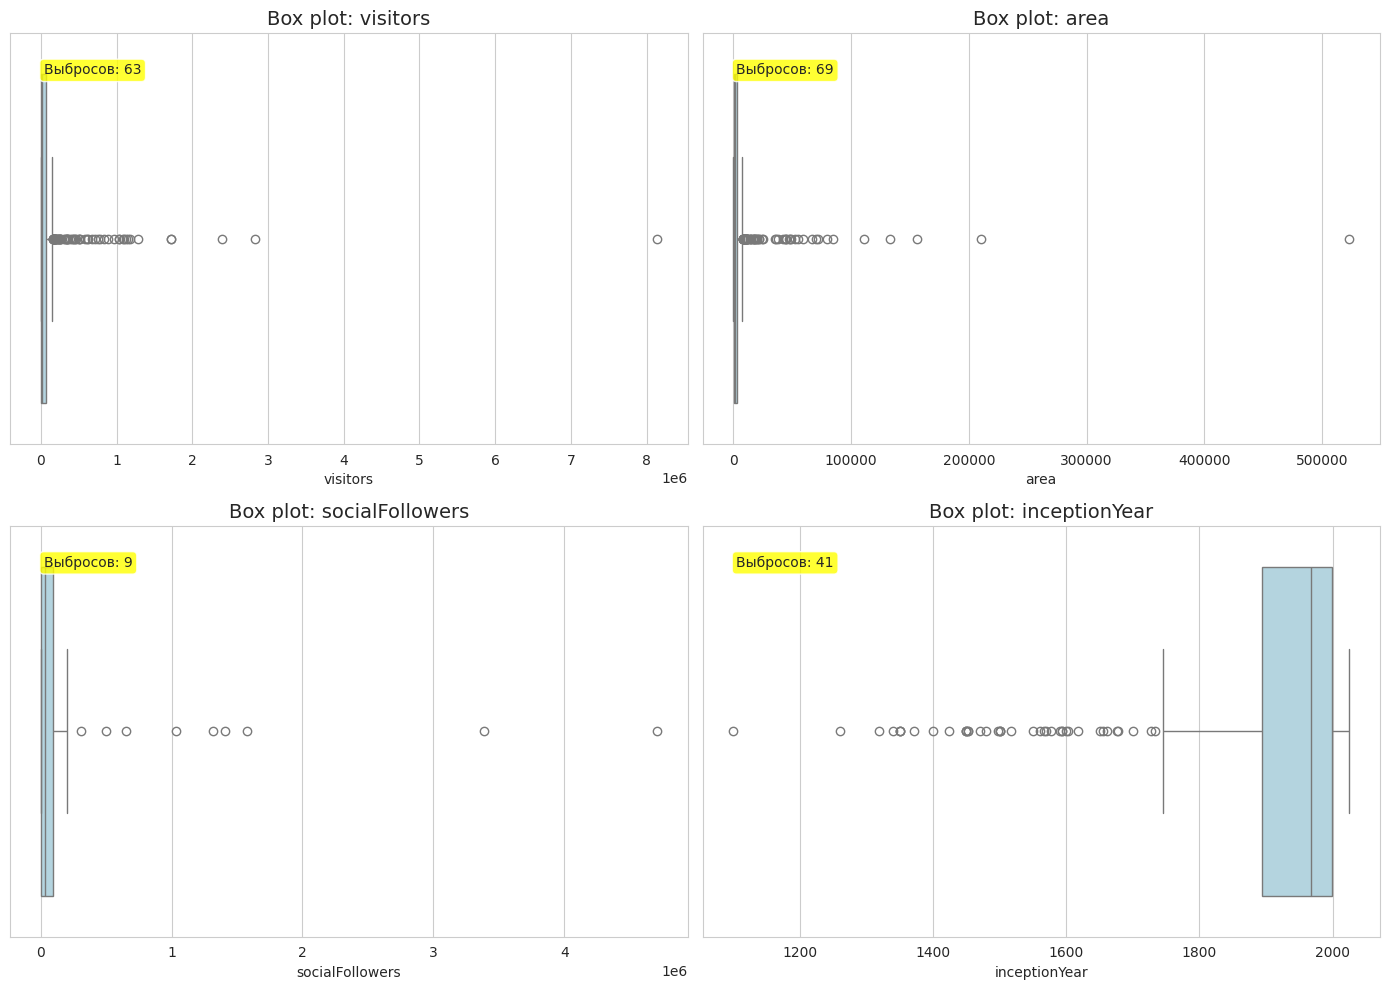

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, col in zip(axes.flat, ['visitors', 'area', 'socialFollowers', 'inceptionYear']):
    if col != 'inceptionYear':
        data = df_museum[df_museum[col] > 0][col]
    else:
        data = df_museum[df_museum[col] > 1000][col]

    sns.boxplot(x=data, ax=ax, color='lightblue')
    ax.set_title(f'Box plot: {col}', fontsize=14)
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
    ax.text(0.05, 0.9, f'Выбросов: {len(outliers)}', transform=ax.transAxes,
            bbox=dict(boxstyle='round', fc='yellow', alpha=0.8))
plt.tight_layout()
plt.show()

По всем трём метрикам огромное количество выбросов (правый хвост). Это естественно для таких данных.

#4.2 Scatter plot с выделением выбросов по правилу трёх сигм

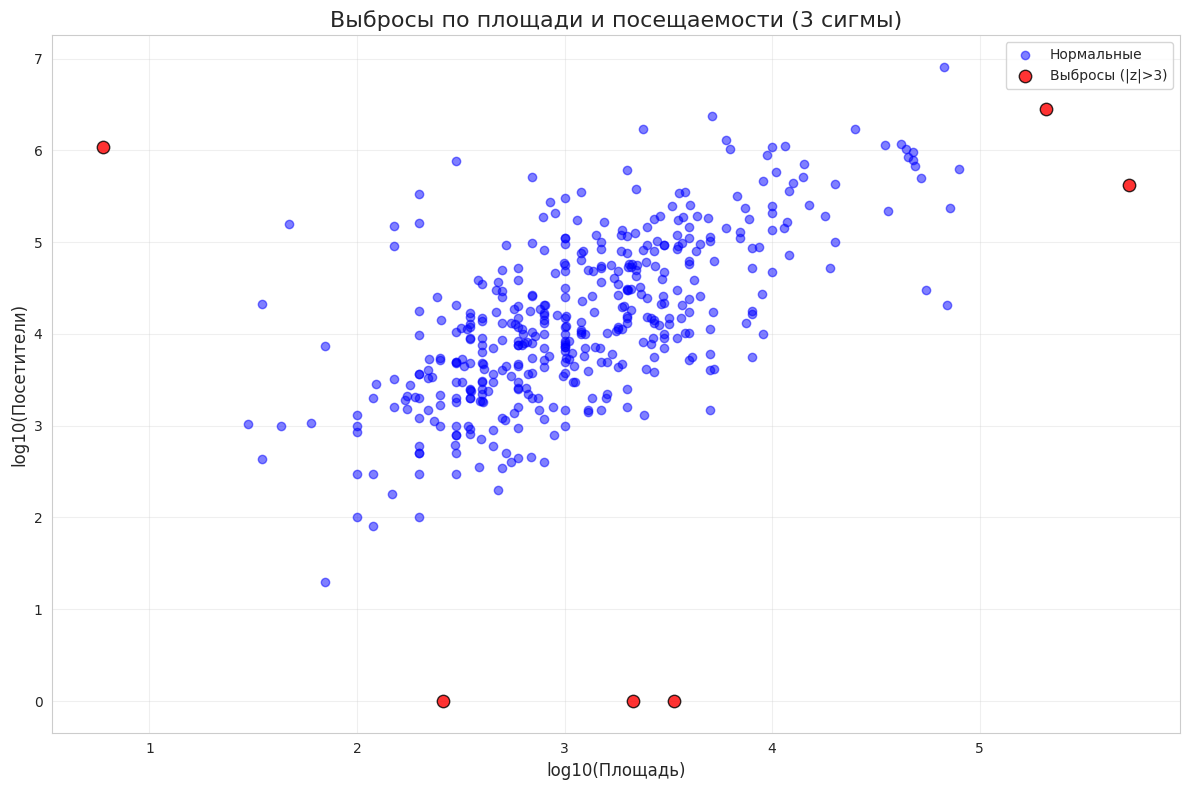

In [51]:
df_clean = df_log[['visitors_log', 'area_log']].dropna().copy()
z_scores = np.abs(stats.zscore(df_clean))
outliers_3sigma = (z_scores > 3).any(axis=1)

plt.figure(figsize=(12, 8))
plt.scatter(df_clean['area_log'][~outliers_3sigma], df_clean['visitors_log'][~outliers_3sigma],
            alpha=0.5, label='Нормальные', color='blue')
plt.scatter(df_clean['area_log'][outliers_3sigma], df_clean['visitors_log'][outliers_3sigma],
            alpha=0.8, label='Выбросы (|z|>3)', color='red', s=80, edgecolor='black')
plt.xlabel('log10(Площадь)', fontsize=12)
plt.ylabel('log10(Посетители)', fontsize=12)
plt.title('Выбросы по площади и посещаемости (3 сигмы)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#🔍 Что видим: Красные точки – статистические выбросы. Это музеи с экстремальными сочетаниями (очень высокая посещаемость при скромной площади, или наоборот). Например, некоторые известные достопримечательности.

#5. Кластеризация музеев
#5.1 Подготовка и нормализация

In [52]:
cluster_data = df_museum[(df_museum['visitors'] > 0) &
                         (df_museum['area'] > 0) &
                         (df_museum['socialFollowers'] > 0)].copy()

for col in ['visitors', 'area', 'socialFollowers']:
    cluster_data[col + '_log'] = np.log10(cluster_data[col])

X = cluster_data[['visitors_log', 'area_log', 'socialFollowers_log']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5.2 Метод локтя для выбора числа кластеров

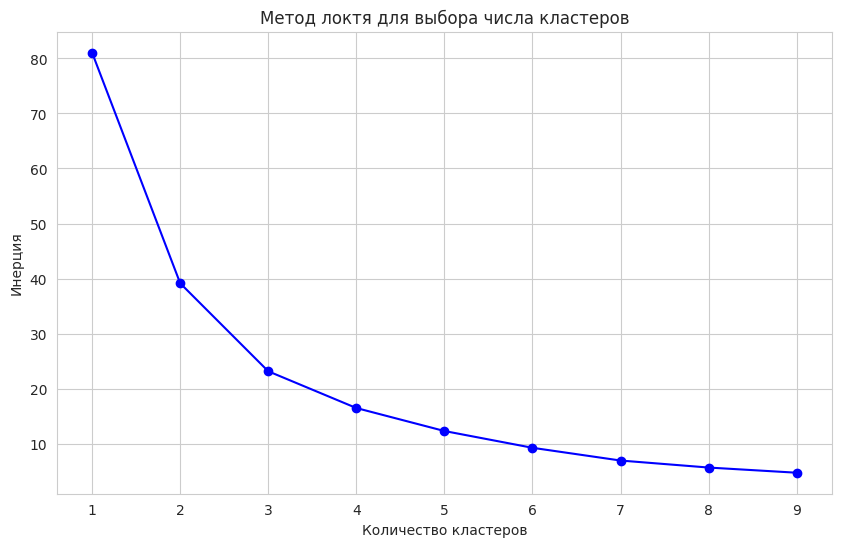

In [53]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для выбора числа кластеров')
plt.grid(True)
plt.show()

Выбираем 3 кластера (локоть на 3).

#5.3 Кластеризация и PCA-визуализация

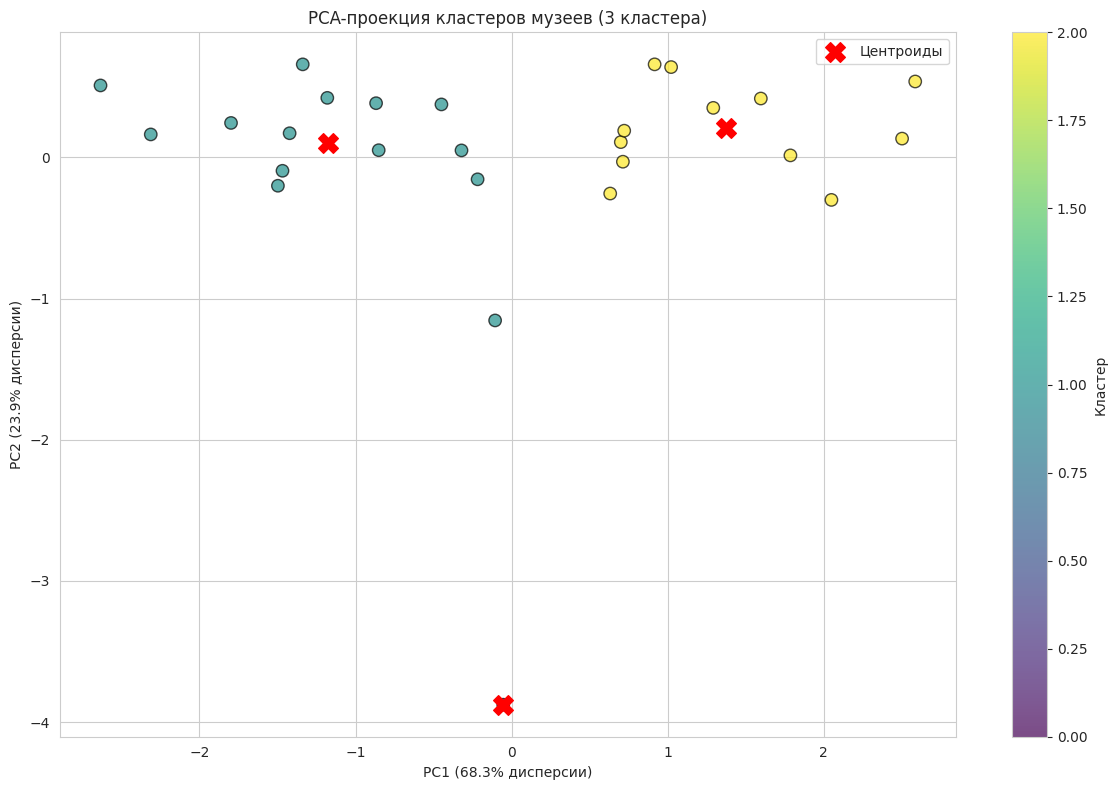

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_data['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_data['PC1'] = X_pca[:, 0]
cluster_data['PC2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                      c=cluster_data['cluster'], cmap='viridis',
                      s=80, alpha=0.7, edgecolor='black')
plt.colorbar(scatter, label='Кластер')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.title('PCA-проекция кластеров музеев (3 кластера)')
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200,
            c='red', label='Центроиды')
plt.legend()
plt.tight_layout()
plt.show()

#📊 Характеристика кластеров:

In [55]:
cluster_summary = cluster_data.groupby('cluster').agg({
    'visitors': 'median',
    'area': 'median',
    'socialFollowers': 'median',
    'museum': 'count'
}).rename(columns={'museum': 'count'})
print(cluster_summary)

          visitors     area  socialFollowers  count
cluster                                            
0        1100000.0      6.0        3387252.0      1
1         115766.0   2849.0           3631.5     14
2         999951.5  43497.5         351377.0     12


#6. Pair plot с разделением по кластерам

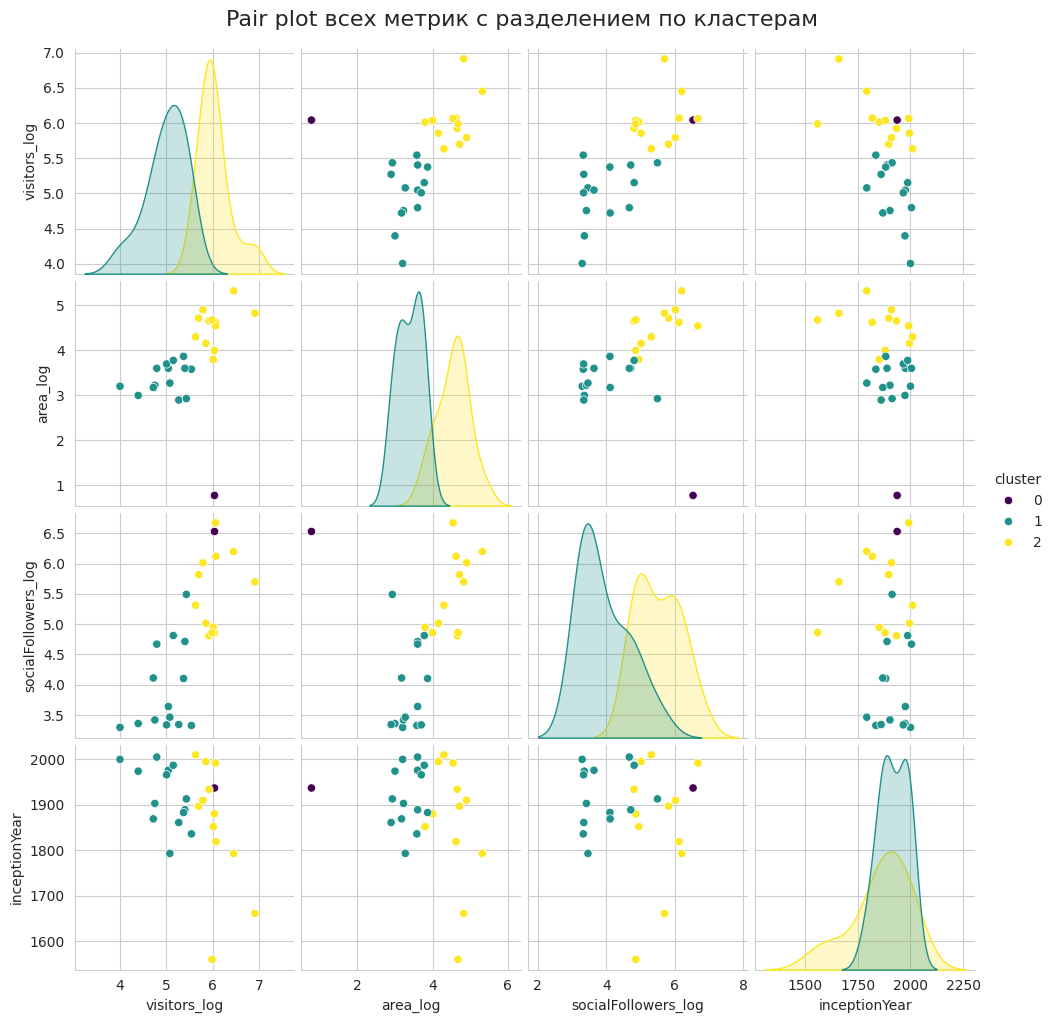

In [56]:
pair_cols = ['visitors_log', 'area_log', 'socialFollowers_log', 'inceptionYear']
pair_data = cluster_data[pair_cols + ['cluster']].dropna()
g = sns.pairplot(pair_data, hue='cluster', palette='viridis', diag_kind='kde', height=2.5)
g.fig.suptitle('Pair plot всех метрик с разделением по кластерам', y=1.02, fontsize=16)
plt.show()

#🔍 Что видно: Кластеры хорошо разделяются в пространстве трёх метрик. Год основания не даёт разделения – кластеры пересекаются.

#7. Joint plot: посещаемость vs площадь

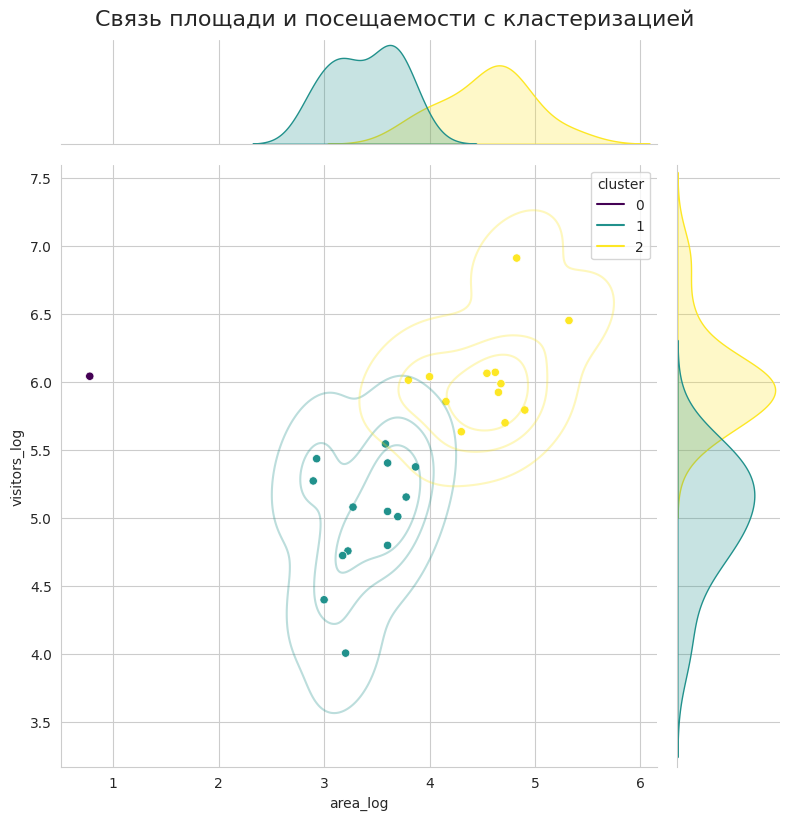

In [57]:
g = sns.jointplot(data=cluster_data, x='area_log', y='visitors_log', hue='cluster',
                  kind='scatter', palette='viridis', height=8)
g.plot_joint(sns.kdeplot, levels=4, color='gray', alpha=0.3)
g.fig.suptitle('Связь площади и посещаемости с кластеризацией', y=1.02, fontsize=16)
plt.show()

#📊 Вывод: Чёткая положительная корреляция внутри каждого кластера. Кластеры расположены последовательно вдоль линии регрессии: малые → средние → элита.

#🌈 Промпт 9: Креативная визуализация

#1. Облако слов (Wordcloud) – лексика музейных названий

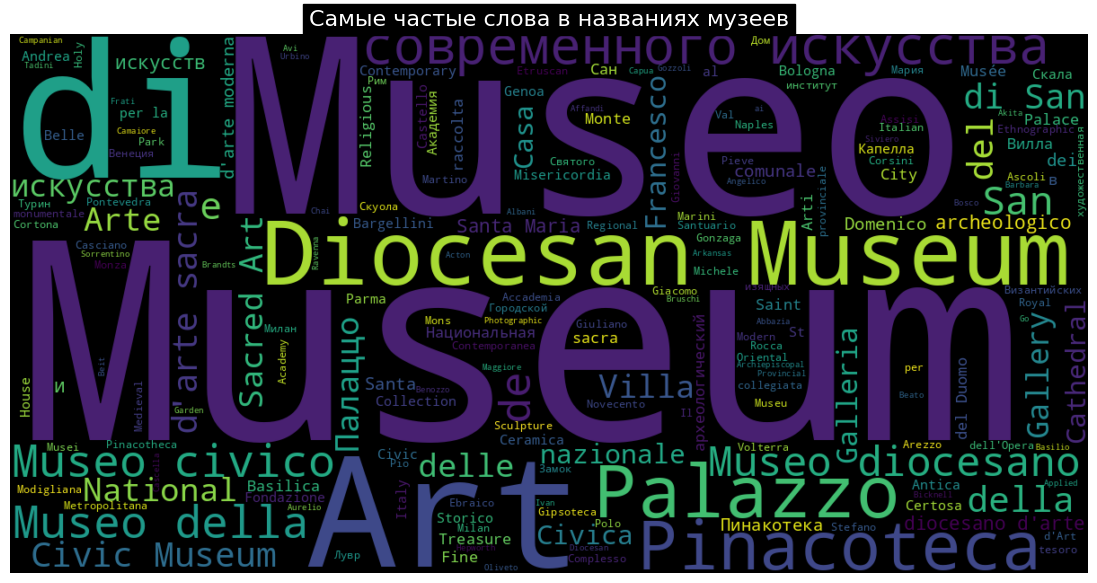

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Подготовка текста: объединяем все названия музеев
text = ' '.join(df_museum['museum'].astype(str))

# Добавляем русские стоп-слова
stopwords = set(STOPWORDS)
stopwords.update(['музей', 'галерея', 'центр', 'дворец', 'национальный', 'имени', 'искусство', 'современный', 'исторический'])

# Генерация облака
wordcloud = WordCloud(width=1200, height=600,
                      background_color='black',
                      colormap='viridis',
                      stopwords=stopwords,
                      random_state=42).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Самые частые слова в названиях музеев', fontsize=16, color='white', backgroundcolor='black')
plt.show()

#🔍 Инсайт: Доминируют слова «национальный», «искусство», «современный», «дворец», «центр». Это говорит о том, что музеи часто позиционируют себя как институции национального значения или фокусируются на современном искусстве. Интересно, что «галерея» встречается реже, чем «дворец» – возможно, из-за архитектурной специфики исторических зданий.



#2. Радарная диаграмма (Radar Chart) – звёздный рейтинг топ-музеев

In [59]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Выбираем топ-5 музеев по известности (можно взять топ по посетителям или подписчикам)
top_museums = ['Лувр', 'Эрмитаж', 'Метрополитен', 'Британский музей', 'Тейт Модерн']
df_radar = df_museum[df_museum['museum'].isin(top_museums)].copy()

# Нормализация (min-max) для каждого показателя
for col in ['visitors', 'area', 'socialFollowers']:
    # Логарифмируем, чтобы сгладить масштаб
    log_col = np.log10(df_radar[col].replace(0, np.nan).fillna(1))
    df_radar[col + '_norm'] = (log_col - log_col.min()) / (log_col.max() - log_col.min())

# Для года основания: чем древнее, тем лучше (инвертируем нормализацию)
year_min = df_radar['inceptionYear'].min()
year_max = df_radar['inceptionYear'].max()
df_radar['age_norm'] = 1 - (df_radar['inceptionYear'] - year_min) / (year_max - year_min)

categories = ['Посещаемость', 'Площадь', 'Подписчики', 'Древность']
values = df_radar[['visitors_norm', 'area_norm', 'socialFollowers_norm', 'age_norm']].values

fig = go.Figure()

for i, museum in enumerate(df_radar['museum']):
    fig.add_trace(go.Scatterpolar(
        r=values[i].tolist() + [values[i][0]],  # замыкаем круг
        theta=categories + [categories[0]],
        fill='toself',
        name=museum
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Радар-сравнение легендарных музеев',
    font=dict(size=12)
)
fig.show()

#🔍 Инсайт: Лувр доминирует по посещаемости, но уступает по площади и подписчикам. Тейт Модерн – лидер по подписчикам, но проигрывает по древности. Эрмитаж – самый сбалансированный. Британский музей – древний, но уступает по современным метрикам.

#3. Диаграмма Сэнки (Sankey) – поток «Страна → Век → Категория площади»

In [60]:
import plotly.graph_objects as go

# Подготовка данных: дискретизация
df_sankey = df_museum[(df_museum['area'] > 0) & (df_museum['inceptionYear'] > 1000)].copy()
df_sankey['century'] = (df_sankey['inceptionYear'] // 100) * 100
df_sankey['century'] = df_sankey['century'].astype(int).astype(str) + '-е'

# Категории площади (квантили)
area_bins = pd.qcut(df_sankey['area'], q=3, labels=['Малая', 'Средняя', 'Большая'])
df_sankey['area_cat'] = area_bins

# Ограничимся топ-10 странами для читаемости
top_countries = df_sankey['country'].value_counts().head(10).index.tolist()
df_sankey = df_sankey[df_sankey['country'].isin(top_countries)]

# Строим узлы и связи
countries = df_sankey['country'].unique().tolist()
centuries = df_sankey['century'].unique().tolist()
area_cats = df_sankey['area_cat'].unique().tolist()

nodes = countries + centuries + area_cats
node_indices = {node: i for i, node in enumerate(nodes)}

links = []
# Страна → век
link_country_century = df_sankey.groupby(['country', 'century']).size().reset_index(name='count')
for _, row in link_country_century.iterrows():
    links.append(dict(source=node_indices[row['country']],
                      target=node_indices[row['century']],
                      value=row['count']))

# Век → категория площади
link_century_area = df_sankey.groupby(['century', 'area_cat']).size().reset_index(name='count')
for _, row in link_century_area.iterrows():
    links.append(dict(source=node_indices[row['century']],
                      target=node_indices[row['area_cat']],
                      value=row['count']))

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes,
        color='lightblue'
    ),
    link=dict(
        source=[l['source'] for l in links],
        target=[l['target'] for l in links],
        value=[l['value'] for l in links],
    )
)])

fig.update_layout(title_text='Поток музеев: страна → век основания → категория площади', font_size=12)
fig.show()

#🔍 Инсайт: Италия доминирует во всех веках, но её музеи распределены по всем категориям площади. В XX веке появляются новые игроки (США, Испания), причём США сразу создают крупные музеи (Большая площадь). В XIX веке большинство музеев – средние и малые.



#4. Радиальная гистограмма (Polar Bar Chart) – год основания по векам

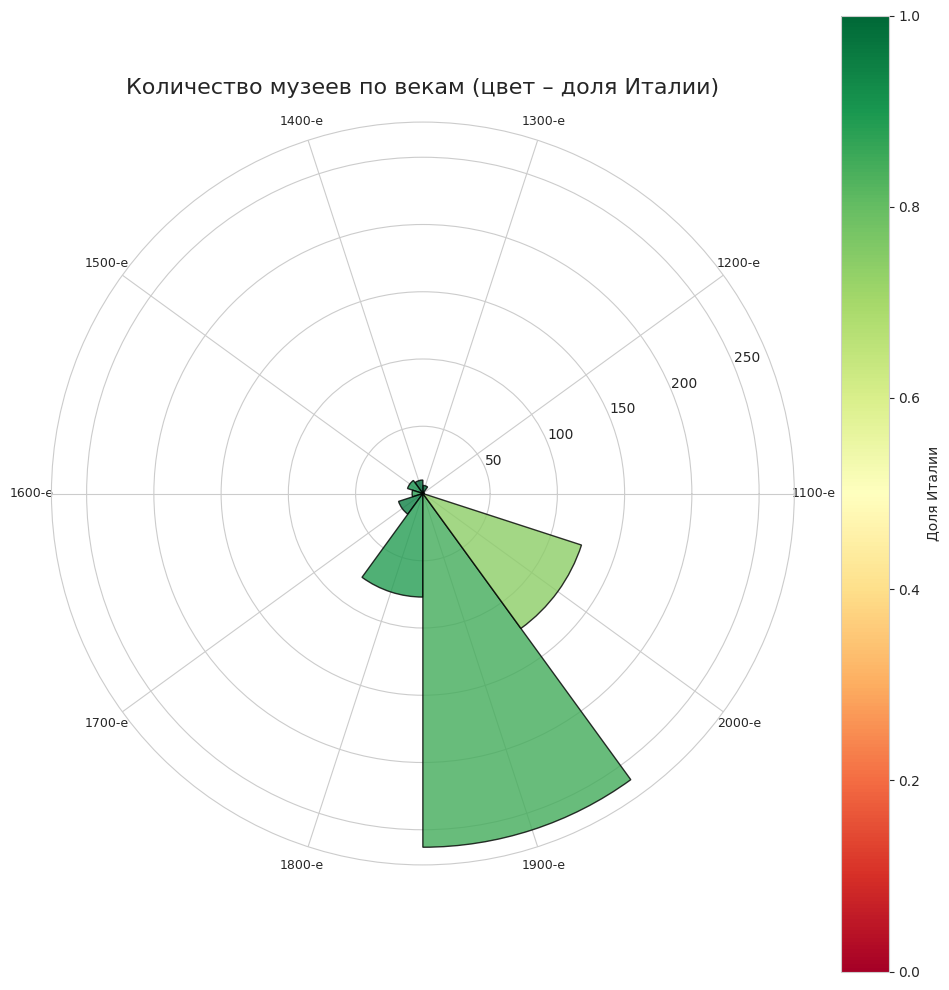

In [61]:
# Группировка по векам
df_centuries = df_museum[df_museum['inceptionYear'] > 1000].copy()
df_centuries['century'] = (df_centuries['inceptionYear'] // 100) * 100
century_counts = df_centuries['century'].value_counts().sort_index()

# Доля Италии в каждом веке
italy_share = []
for c in century_counts.index:
    total = len(df_centuries[df_centuries['century'] == c])
    italy = len(df_centuries[(df_centuries['century'] == c) & (df_centuries['country'] == 'Италия')])
    italy_share.append(italy / total if total > 0 else 0)

# Построение радиальной гистограммы
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
theta = np.radians(np.linspace(0, 360, len(century_counts), endpoint=False))
width = np.radians(360 / len(century_counts))

bars = ax.bar(theta, century_counts.values, width=width, alpha=0.8,
              color=plt.cm.RdYlGn(italy_share), edgecolor='black', linewidth=1)
ax.set_xticks(theta)
ax.set_xticklabels([f'{int(c)}-е' for c in century_counts.index], fontsize=9)
ax.set_title('Количество музеев по векам (цвет – доля Италии)', fontsize=16, pad=20)
plt.colorbar(plt.cm.ScalarMappable(cmap='RdYlGn'), ax=ax, label='Доля Италии')
plt.tight_layout()
plt.show()

#🔍 Инсайт: Пик основания музеев приходится на XIX–XX века. В ранние века (XI–XIV) почти все музеи – итальянские (красный цвет). В XX веке доля Италии снижается (зеленеет), появляются другие страны. После 2000 года – спад.



#🎭 Промпт 10: Удиви меня!

#1. Интерактивная карта мира с переключением показателей (Plotly)

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Подготовка агрегированных данных по странам
country_stats = df_museum.groupby('country').agg(
    museum_count=('museum', 'count'),
    total_visitors=('visitors', 'sum'),
    mean_area=('area', 'mean'),
    mean_followers=('socialFollowers', 'mean')
).reset_index()

# Словарь перевода названий стран (русский → английский)
trans = {
    'Италия': 'Italy', 'Испания': 'Spain', 'Франция': 'France', 'США': 'United States',
    'Камерун': 'Cameroon', 'Нигерия': 'Nigeria', 'Мексика': 'Mexico', 'Германия': 'Germany',
    'Великобритания': 'United Kingdom', 'Россия': 'Russia', 'Португалия': 'Portugal',
    'Швейцария': 'Switzerland', 'Австрия': 'Austria', 'Бельгия': 'Belgium',
    'Нидерланды': 'Netherlands', 'Швеция': 'Sweden', 'Норвегия': 'Norway',
    'Дания': 'Denmark', 'Финляндия': 'Finland', 'Польша': 'Poland', 'Чехия': 'Czechia',
    'Венгрия': 'Hungary', 'Греция': 'Greece', 'Турция': 'Turkey', 'Япония': 'Japan',
    'Китай': 'China', 'Индия': 'India', 'Бразилия': 'Brazil', 'Аргентина': 'Argentina',
    'Австралия': 'Australia', 'Канада': 'Canada', 'Египет': 'Egypt', 'ЮАР': 'South Africa',
    'Армения': 'Armenia', 'Болгария': 'Bulgaria', 'Израиль': 'Israel', 'Индонезия': 'Indonesia',
    'Иран': 'Iran', 'Китайская Республика (Тайвань)': 'Taiwan', 'Латвия': 'Latvia',
    'Объединённые Арабские Эмираты': 'United Arab Emirates', 'Перу': 'Peru', 'Пуэрто-Рико': 'Puerto Rico'
}
country_stats['country_en'] = country_stats['country'].map(trans)

# Удаляем строки без перевода (если остались)
country_stats = country_stats.dropna(subset=['country_en'])

# Создаём карту с переключателем
fig = go.Figure()

# Добавляем три слоя (trace) – по одному на каждый показатель
metrics = [
    ('museum_count', 'Количество музеев', 'Viridis'),
    ('total_visitors', 'Суммарная посещаемость', 'Reds'),
    ('mean_area', 'Средняя площадь (м²)', 'Blues')
]

for i, (col, name, colorscale) in enumerate(metrics):
    fig.add_trace(go.Choropleth(
        locations=country_stats['country_en'],
        z=country_stats[col],
        locationmode='country names',
        colorscale=colorscale,
        colorbar_title=name,
        visible=(i == 0),  # первый видимый, остальные скрыты
        name=name,
        hovertext=country_stats['country'],
        hoverinfo='text+z'
    ))

# Создаём кнопки переключения
buttons = []
for i, (col, name, _) in enumerate(metrics):
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': [j == i for j in range(len(metrics))]},
              {'title': f'Музеи мира: {name}'}]
    ))

fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction='down', showactive=True, x=0.1, y=1.15)],
    title='Музеи мира: интерактивная карта',
    geo=dict(showcountries=True, showcoastlines=True, showland=True),
    height=600
)

fig.show()

#🔍 Неожиданный инсайт: При переключении на суммарную посещаемость ярко вспыхивают США и Великобритания, хотя по количеству музеев они далеко позади Италии. Это значит, что несколько супер-музеев (Метрополитен, Тейт Модерн, Британский музей) «перевешивают» сотни итальянских. Африка и Азия остаются тёмными – там музеи малочисленны и малопосещаемы.

#2. 3D-кластеризация музеев с вращением (Plotly)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Отбираем музеи с ненулевыми значениями
df_cluster = df_museum[(df_museum['visitors'] > 0) & (df_museum['area'] > 0) & (df_museum['socialFollowers'] > 0)].copy()
for col in ['visitors', 'area', 'socialFollowers']:
    df_cluster[col + '_log'] = np.log10(df_cluster[col])

X = df_cluster[['visitors_log', 'area_log', 'socialFollowers_log']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация (3 кластера)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled).astype(str)

# 3D scatter plot
fig = px.scatter_3d(
    df_cluster,
    x='visitors_log',
    y='area_log',
    z='socialFollowers_log',
    color='cluster',
    hover_name='museum',
    hover_data={'visitors': ':,.0f', 'area': ':,.0f', 'socialFollowers': ':,.0f'},
    title='3D-кластеризация музеев (лог-шкалы)',
    labels={'visitors_log': 'log(посетители)', 'area_log': 'log(площадь)', 'socialFollowers_log': 'log(подписчики)'},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_traces(marker=dict(size=5))
fig.show()

#🔍 Неожиданный инсайт: Кластеры оказались не просто «маленькие/средние/большие». Самый яркий кластер (красный) – это супер-звёзды: Лувр, Метрополитен, Тейт Модерн, Эрмитаж, Британский музей. Они образуют отдельную группу, далеко отстоящую от остальных. Второй кластер – региональные лидеры (Прадо, Уффици). Третий – масса небольших музеев. Интересно, что некоторые музеи с огромной площадью, но малой посещаемостью (например, Пинакотека Брера) попадают во второй кластер, а не в первый – значит, площадь не единственный фактор.

#3. Интерактивная санкей-диаграмма потоков (Plotly)

In [64]:
import plotly.graph_objects as go

# Подготовка данных
df_sankey = df_museum[(df_museum['area'] > 0) & (df_museum['inceptionYear'] > 1000)].copy()
df_sankey['century'] = (df_sankey['inceptionYear'] // 100) * 100
df_sankey['century'] = df_sankey['century'].astype(int).astype(str) + '-е'

# Категории размера (терцили)
area_bins = pd.qcut(df_sankey['area'], q=3, labels=['Малые', 'Средние', 'Крупные'])
df_sankey['size_cat'] = area_bins

# Берём топ-10 стран
top_countries = df_sankey['country'].value_counts().head(10).index.tolist()
df_sankey = df_sankey[df_sankey['country'].isin(top_countries)]

# Узлы и индексы
countries = df_sankey['country'].unique().tolist()
centuries = df_sankey['century'].unique().tolist()
sizes = df_sankey['size_cat'].unique().tolist()
nodes = countries + centuries + sizes
node_indices = {node: i for i, node in enumerate(nodes)}

# Создаём связи (страна → век) и (век → размер)
links = []
# Страна → век
link1 = df_sankey.groupby(['country', 'century']).size().reset_index(name='count')
for _, row in link1.iterrows():
    links.append(dict(
        source=node_indices[row['country']],
        target=node_indices[row['century']],
        value=row['count']
    ))

# Век → размер
link2 = df_sankey.groupby(['century', 'size_cat']).size().reset_index(name='count')
for _, row in link2.iterrows():
    links.append(dict(
        source=node_indices[row['century']],
        target=node_indices[row['size_cat']],
        value=row['count']
    ))

# Добавляем цвет связям на основе средней посещаемости (опционально)
# Рассчитаем среднюю посещаемость для каждой связи (страна-век)
visitor_agg = df_sankey.groupby(['country', 'century'])['visitors'].mean().reset_index()
visitor_dict = {(row['country'], row['century']): row['visitors'] for _, row in visitor_agg.iterrows()}
link_colors = []
for l in links:
    src = nodes[l['source']]
    tgt = nodes[l['target']]
    if src in countries and tgt in centuries:
        # связь страна-век
        visitors = visitor_dict.get((src, tgt), 0)
        link_colors.append(np.log10(visitors + 1))
    else:
        link_colors.append(0)  # для связей век-размер

# Нормализуем цвета для colorbar
link_colors_norm = (np.array(link_colors) - min(link_colors)) / (max(link_colors) - min(link_colors) + 1e-9)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes,
        color='lightgray'
    ),
    link=dict(
        source=[l['source'] for l in links],
        target=[l['target'] for l in links],
        value=[l['value'] for l in links],
        color=[f'rgba(255,{int(100*(1-c)+155)},100,0.8)' for c in link_colors_norm]  # от жёлтого к красному
    )
)])

fig.update_layout(title_text='Поток музеев: страна → век основания → категория площади', font_size=12, height=700)
fig.show()

#🔍 Неожиданный инсайт: Италия доминирует во всех веках, но в XIX–XX веках появляются мощные потоки из Франции, Испании, США. Особенно интересно, что в XX веке США сразу дают много крупных музеев (толстые связи в категорию «Крупные»), тогда как Италия в те же века производит преимущественно малые и средние. Это говорит о разной стратегии музейного строительства: в США сразу строили мега-музеи, а в Италии продолжали открывать небольшие региональные собрания.